<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/Machine_learning_1_chipsDataset_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install scikit learn

In [76]:
#!pip install -U scikit-learn

In [77]:
# !pip show scikit-learn
# !pip freeze

# import necessary libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Load the dataset

In [79]:
chips_url='/content/chip_dataset.csv'
chips=pd.read_csv(chips_url)
chips#.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,20/02/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,06/09/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,02/09/2020,10.0,28.0,NaN,NaN,2600,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,01/09/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,03/05/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,22/02/2011,40.0,75.0,332.0,1950.0,450,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,01/06/2005,90.0,7.0,NaN,NaN,250,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,03/03/2010,40.0,23.0,100.0,486.0,500,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,06/03/2003,150.0,NaN,65.0,29.0,250,TSMC,NVIDIA,NaN,NaN,NaN


In [80]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   int64  
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 531.0+ 

<Axes: >

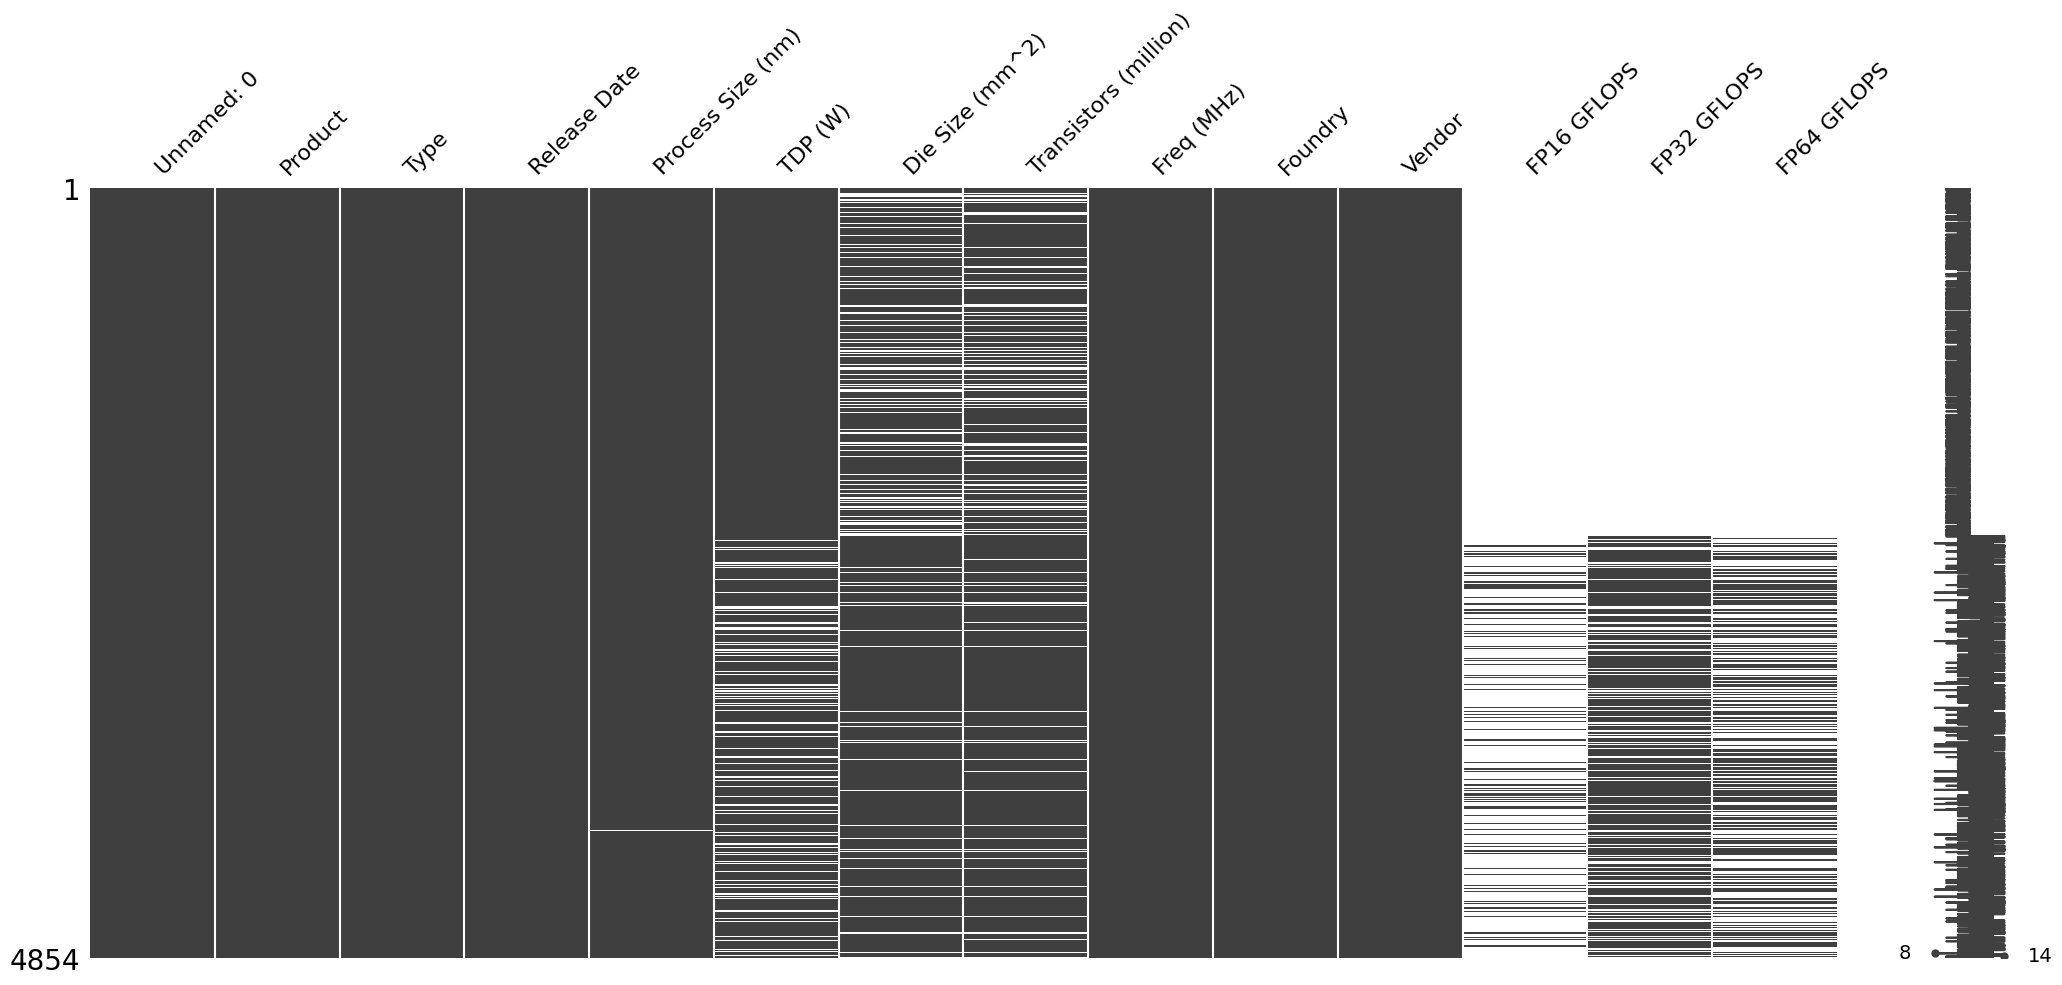

In [81]:
msno.matrix(chips)

<Axes: >

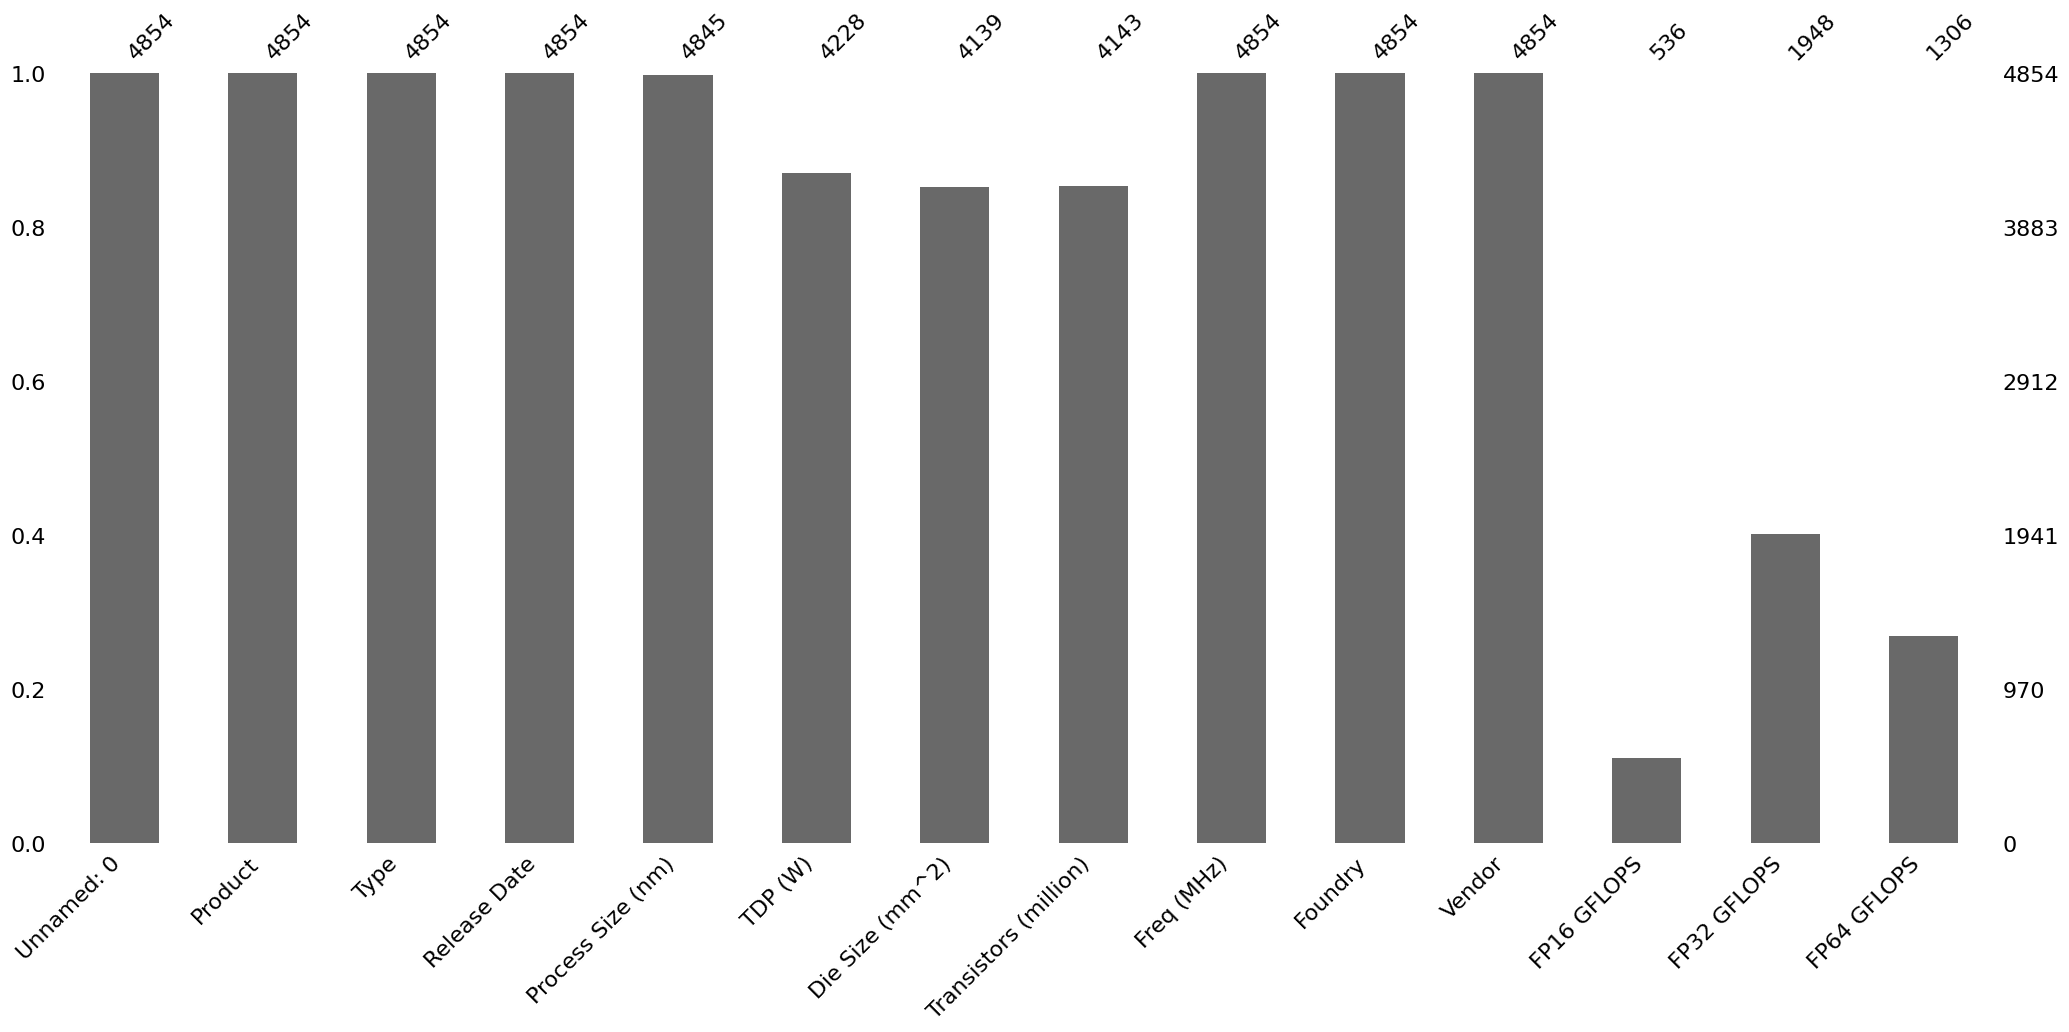

In [82]:
msno.bar(chips)

In [83]:
chips.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [84]:
columns_to_drop=['Unnamed: 0','FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
chips.drop(columns=columns_to_drop,inplace=True)
chips

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,20/02/2007,65.0,45.0,77.0,122.0,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,06/09/2018,14.0,35.0,192.0,4800.0,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,02/09/2020,10.0,28.0,NaN,NaN,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,01/09/2013,22.0,80.0,160.0,1400.0,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,03/05/2011,45.0,125.0,258.0,758.0,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,22/02/2011,40.0,75.0,332.0,1950.0,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,01/06/2005,90.0,7.0,NaN,NaN,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,03/03/2010,40.0,23.0,100.0,486.0,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,06/03/2003,150.0,NaN,65.0,29.0,250,TSMC,NVIDIA


In [85]:
chips.isnull().sum()

,0
Product,0
Type,0
Release Date,0
Process Size (nm),9
TDP (W),626
Die Size (mm^2),715
Transistors (million),711
Freq (MHz),0
Foundry,0
Vendor,0


In [86]:
# convert 'release date' column to date time format
chips['Release Date']=pd.to_datetime(chips['Release Date'])
chips

<ipython-input-86-186321a71cf1>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  chips['Release Date']=pd.to_datetime(chips['Release Date'])


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250,TSMC,NVIDIA


In [87]:
chips.isnull().sum()

,0
Product,0
Type,0
Release Date,75
Process Size (nm),9
TDP (W),626
Die Size (mm^2),715
Transistors (million),711
Freq (MHz),0
Foundry,0
Vendor,0


In [88]:
# rearrange rows by release date from earliest to latest
chips=chips.sort_values(by='Release Date')
chips.head(50)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
4421,Intel i815 Graphics,GPU,2000-01-01,150.0,NaN,NaN,NaN,133,Intel,Intel
4357,NVIDIA Vanta LT,GPU,2000-03-01,250.0,NaN,90.0,15.0,105,TSMC,NVIDIA
3074,Sony Playstation 2 GPU 250nm,GPU,2000-03-04,250.0,79.0,279.0,54.0,147,Sony,Other
3721,ATI Radeon DDR,GPU,2000-04-01,180.0,23.0,115.0,30.0,166,TSMC,ATI
3500,ATI Radeon 7200 64 MB,GPU,2000-04-01,180.0,23.0,111.0,30.0,166,TSMC,ATI
4246,ATI Radeon 7200,GPU,2000-04-01,180.0,23.0,111.0,30.0,166,TSMC,ATI
4061,NVIDIA GeForce2 GTS PRO,GPU,2000-04-26,150.0,NaN,88.0,25.0,200,TSMC,NVIDIA
4305,NVIDIA GeForce2 GTS,GPU,2000-04-26,150.0,NaN,88.0,25.0,200,TSMC,NVIDIA
3190,ATI Radeon 7200,GPU,2000-06-01,180.0,23.0,111.0,30.0,143,TSMC,ATI
3720,ATI Fire GL3,GPU,2000-06-01,NaN,NaN,156.0,NaN,120,IBM,ATI


In [89]:
chips.tail(50)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
2855,Matrox M9125 PCIe x16,GPU,NaT,90.0,NaN,NaN,NaN,250,UMC,Other
2864,AMD Radeon Pro V7350X2,GPU,NaT,14.0,200.0,232.0,5700.0,1188,GF,AMD
2924,NVIDIA GRID RTX T10-8,GPU,NaT,12.0,260.0,754.0,18600.0,1065,TSMC,NVIDIA
2945,3dfx Voodoo4-2 4200 PCI 16 MB,GPU,NaT,180.0,15.0,112.0,14.0,166,TSMC,Other
2962,AMD Radeon RX 6600,GPU,NaT,7.0,150.0,236.0,NaN,1489,TSMC,AMD
2963,ATI Radeon HD 2900 XTX,GPU,NaT,80.0,240.0,420.0,720.0,743,TSMC,ATI
2992,Matrox Millennium G450 LP,GPU,NaT,180.0,NaN,NaN,10.0,125,UMC,Other
3054,ATI Radeon HD 5950,GPU,NaT,40.0,302.0,334.0,2154.0,725,TSMC,ATI
3144,AMD Radeon R9 FURY X2,GPU,NaT,28.0,NaN,596.0,8900.0,1050,TSMC,AMD
3199,AMD Radeon HD 8310G IGP,GPU,NaT,32.0,20.0,246.0,1303.0,424,TSMC,AMD


In [90]:
chips.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry',
       'Vendor'],
      dtype='object')

In [91]:
chips = chips.dropna(subset=['Release Date'])
chips = chips.dropna(subset=['Process Size (nm)'])
chips = chips.dropna(subset=['TDP (W)'])
chips = chips.dropna(subset=['Die Size (mm^2)'])
chips = chips.dropna(subset=['Transistors (million)'])

In [92]:
chips['Foundry'].value_counts()

,count
Foundry,
TSMC,1589
Intel,805
Unknown,651
GF,241
Samsung,50
UMC,21
Sony,7
NEC,2
Renesas,1


# filling in missing values for Process Size

In [93]:
# Define a function to interpolate and fill missing values
'''
def fill_process_size(group):
    # Interpolate missing values
    group['Process Size (nm)'] = group['Process Size (nm)'].interpolate(method='linear', limit_direction='forward')
    # Fill any remaining NaN with the group's median
    group['Process Size (nm)'] = group['Process Size (nm)'].fillna(group['Process Size (nm)'].median())
    return group

# Apply the function group-wise
chips_df = chips.groupby(['Vendor', 'Type']).apply(fill_process_size).reset_index(drop=True)
'''

"\ndef fill_process_size(group):\n    # Interpolate missing values\n    group['Process Size (nm)'] = group['Process Size (nm)'].interpolate(method='linear', limit_direction='forward')\n    # Fill any remaining NaN with the group's median\n    group['Process Size (nm)'] = group['Process Size (nm)'].fillna(group['Process Size (nm)'].median())\n    return group\n\n# Apply the function group-wise\nchips_df = chips.groupby(['Vendor', 'Type']).apply(fill_process_size).reset_index(drop=True)\n"

In [94]:
chips.isnull().sum()

,0
Product,0
Type,0
Release Date,0
Process Size (nm),0
TDP (W),0
Die Size (mm^2),0
Transistors (million),0
Freq (MHz),0
Foundry,0
Vendor,0


<Axes: >

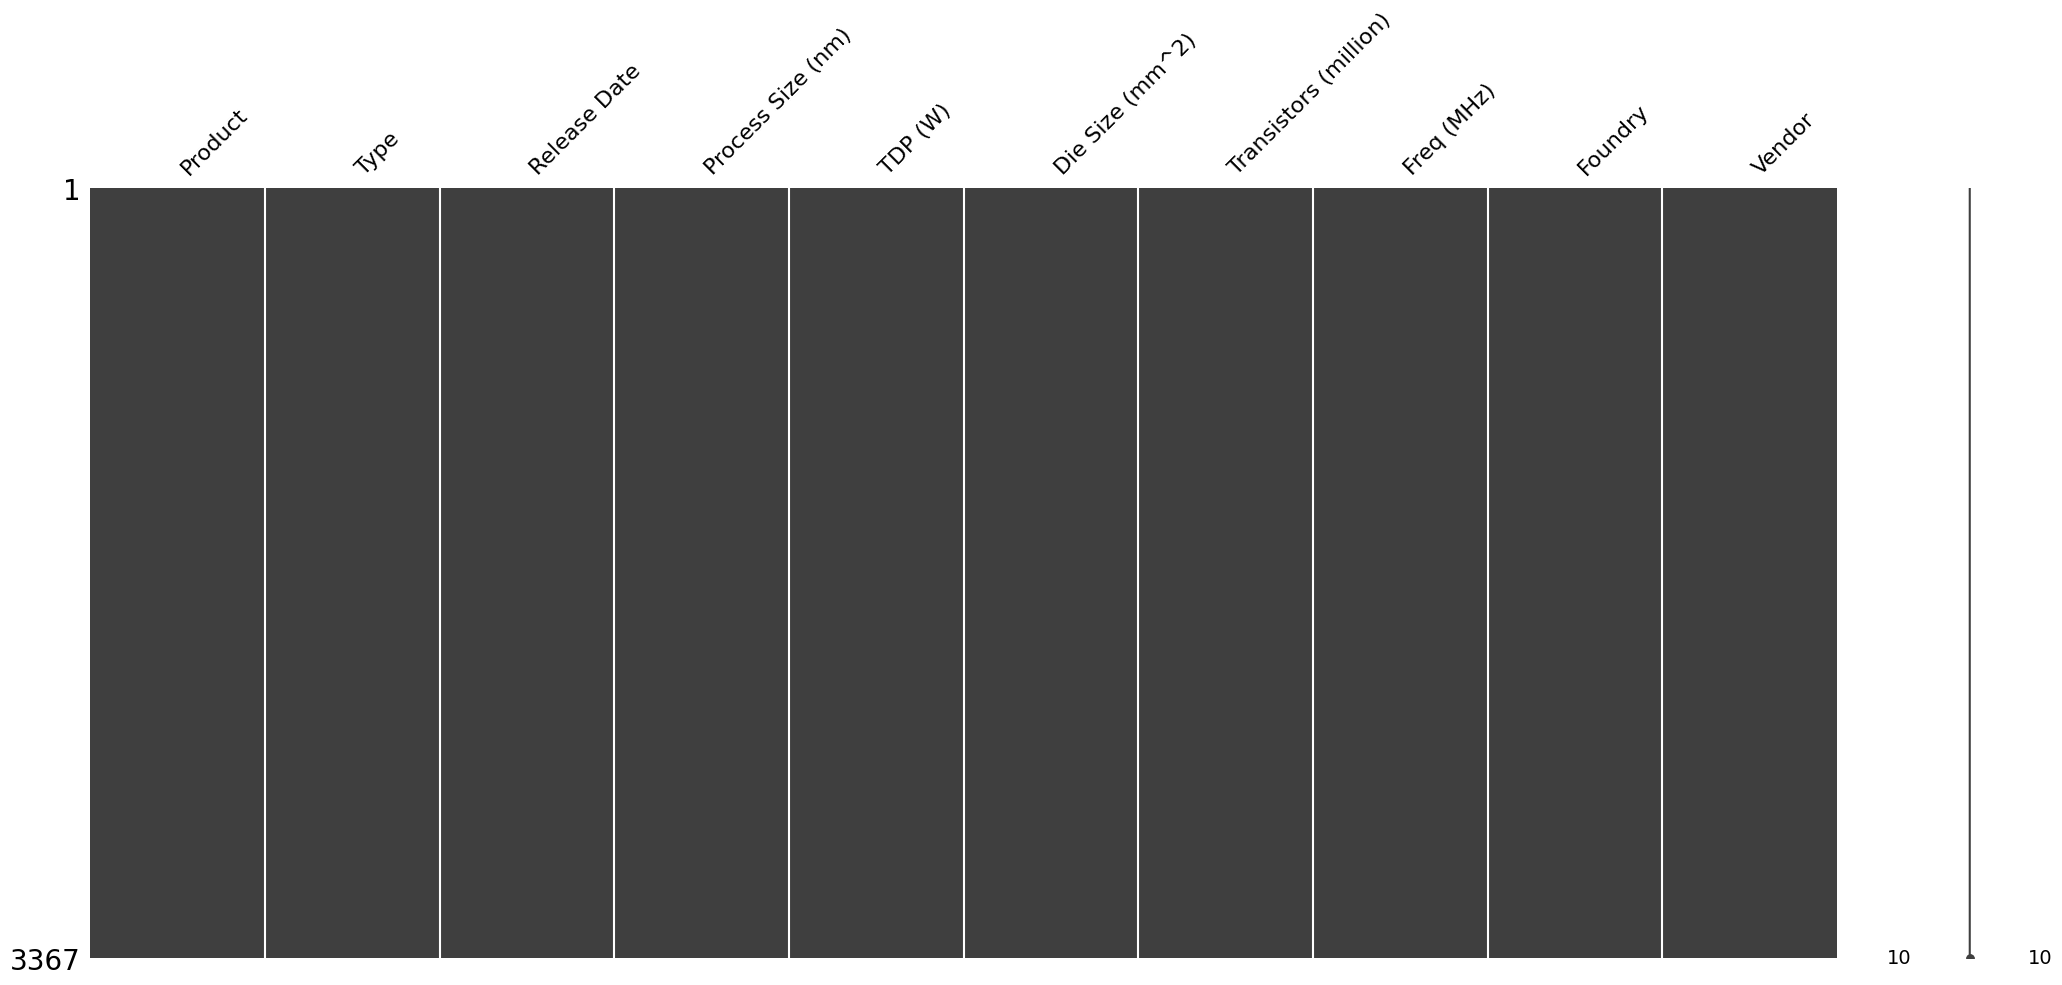

In [95]:
msno.matrix(chips)

# Perfom a full EDA and demonstrate the validity of

- Moore's Law still holds, especially in GPUs.

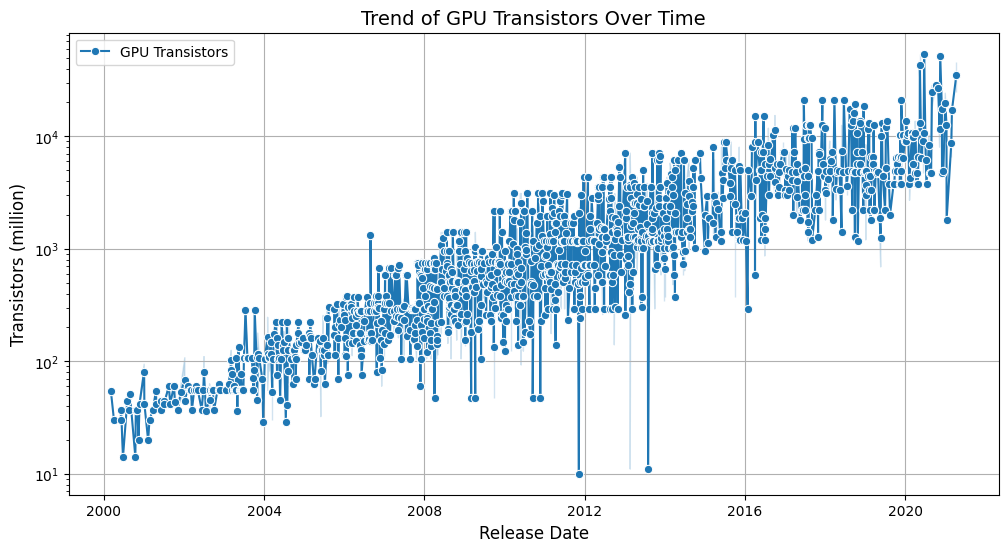

In [96]:
# - Moore's Law still holds, especially in GPUs.
# Plot transistors over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=chips.sort_values('Release Date'), x='Release Date', y='Transistors (million)', marker='o', label='GPU Transistors')

plt.title('Trend of GPU Transistors Over Time', fontsize=14)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Transistors (million)', fontsize=12)
plt.yscale('log')  # Log scale to highlight exponential growth
plt.legend()
plt.grid()
plt.show()


In [97]:
# Rate of Growth (Doubling Time)

# Add a year column for clarity
chips['Year'] = chips['Release Date'].dt.year

# Group by year and calculate median transistor count for clarity
yearly_data = chips.groupby('Year')['Transistors (million)'].median().reset_index()

# Calculate doubling time
yearly_data['Log Transistors'] = np.log2(yearly_data['Transistors (million)'])
yearly_data['Growth Rate'] = yearly_data['Log Transistors'].diff() / yearly_data['Year'].diff()

# Average doubling time
doubling_time = 1 / yearly_data['Growth Rate'].mean()
print(f"Approximate doubling time for GPUs: {doubling_time:.2f} years")


Approximate doubling time for GPUs: 2.37 years


Insights:
- Doubling time for GPUs is near 2 years. Moore's Law may still holds.

Compare Vendors: Analyze whether the trend differs by vendor (e.g., NVIDIA, AMD).

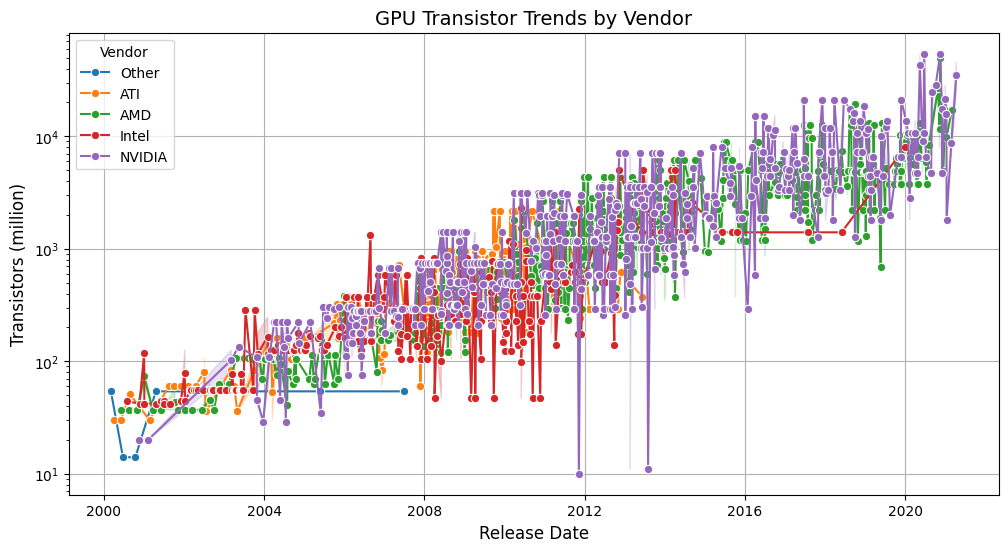

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=chips.sort_values('Release Date'), x='Release Date', y='Transistors (million)', hue='Vendor', marker='o')

plt.title('GPU Transistor Trends by Vendor', fontsize=14)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Transistors (million)', fontsize=12)
plt.yscale('log')
plt.legend(title='Vendor')
plt.grid()
plt.show()


Die Size vs. Transistors
Moore's Law also implies efficient use of die area to increase transistor density.

In [99]:
'''
plt.figure(figsize=(12, 6))
sns.scatterplot(data=chips, x='Die Size (mm^2)', y='Transistors (million)', hue='Release Date', palette='viridis', size='Transistors (million)')

plt.title('Die Size vs. Transistor Count Over Time', fontsize=14)
plt.xlabel('Die Size (mm^2)', fontsize=12)
plt.ylabel('Transistors (million)', fontsize=12)
plt.legend(title='Release Date', loc='upper left')
plt.grid()
plt.show()
'''


"\nplt.figure(figsize=(12, 6))\nsns.scatterplot(data=chips, x='Die Size (mm^2)', y='Transistors (million)', hue='Release Date', palette='viridis', size='Transistors (million)')\n\nplt.title('Die Size vs. Transistor Count Over Time', fontsize=14)\nplt.xlabel('Die Size (mm^2)', fontsize=12)\nplt.ylabel('Transistors (million)', fontsize=12)\nplt.legend(title='Release Date', loc='upper left')\nplt.grid()\nplt.show()\n"

# Dannard Scaling is still valid in general.

Dennard Scaling suggests that as transistors shrink in size, power consumption remains proportional to the area, allowing for higher clock speeds without increasing power usage per unit area. This implies:

- Power efficiency should improve as transistor sizes shrink.
- Clock speeds (frequency) should increase without proportionally higher power dissipation.

To verify Dennard Scaling from your dataset, we need to analyze the relationship between:

- Process Size (nm).
- TDP (Thermal Design Power in W).
- Freq (Frequency in MHz).
- Trends over Release Date.

In [100]:
# Data preparation

# Convert columns to numeric where applicable
chips['Process Size (nm)'] = pd.to_numeric(chips['Process Size (nm)'], errors='coerce')
chips['TDP (W)'] = pd.to_numeric(chips['TDP (W)'], errors='coerce')
chips['Freq (MHz)'] = pd.to_numeric(chips['Freq (MHz)'], errors='coerce')

# Drop rows with missing key values
chips_dennard = chips.dropna(subset=['Process Size (nm)', 'TDP (W)', 'Freq (MHz)', 'Release Date'])

# Add a 'Year' column for grouping
chips_dennard['Year'] = chips_dennard['Release Date'].dt.year


Trend of Frequency vs Process Size

Analyze how clock frequency scales with transistor size.

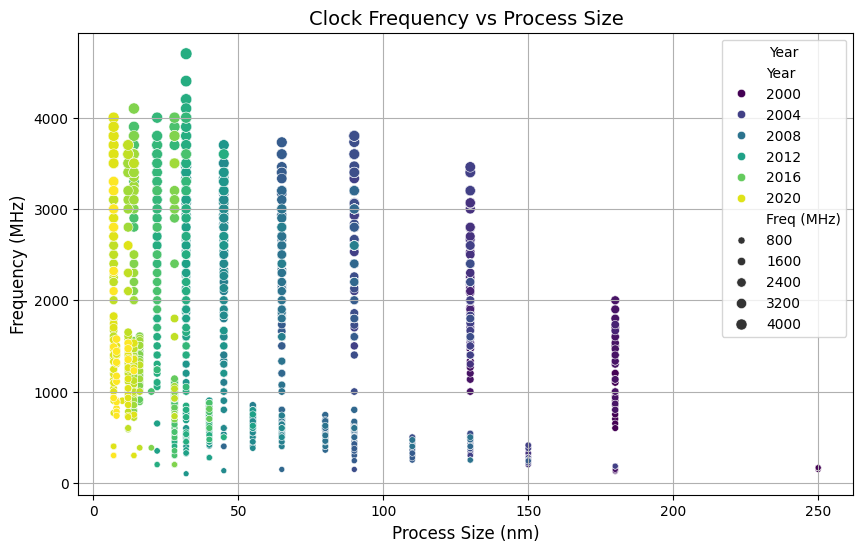

In [101]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=chips_dennard, x='Process Size (nm)', y='Freq (MHz)', hue='Year', palette='viridis', size='Freq (MHz)')

plt.title('Clock Frequency vs Process Size', fontsize=14)
plt.xlabel('Process Size (nm)', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.legend(title='Year')
plt.grid()
plt.show()


Insights:

Smaller process size correspond to higher clock frequencies, proving Dennard Scaling holds.

TDP vs Process Size

Evaluate if power dissipation per chip has decreased as process size shrinks.

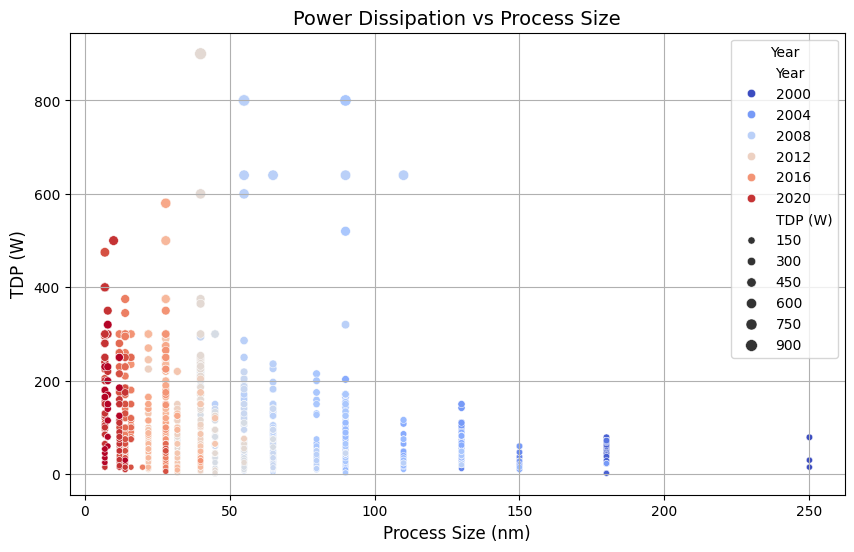

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chips_dennard, x='Process Size (nm)', y='TDP (W)', hue='Year', palette='coolwarm', size='TDP (W)')

plt.title('Power Dissipation vs Process Size', fontsize=14)
plt.xlabel('Process Size (nm)', fontsize=12)
plt.ylabel('TDP (W)', fontsize=12)
plt.legend(title='Year')
plt.grid()
plt.show()


Insights:

TDP decreases with shrinking process sizes, indicating adherence to Dennard Scaling.


Efficiency Analysis (Frequency per Watt)

Calculate and visualize the power efficiency trend over time:

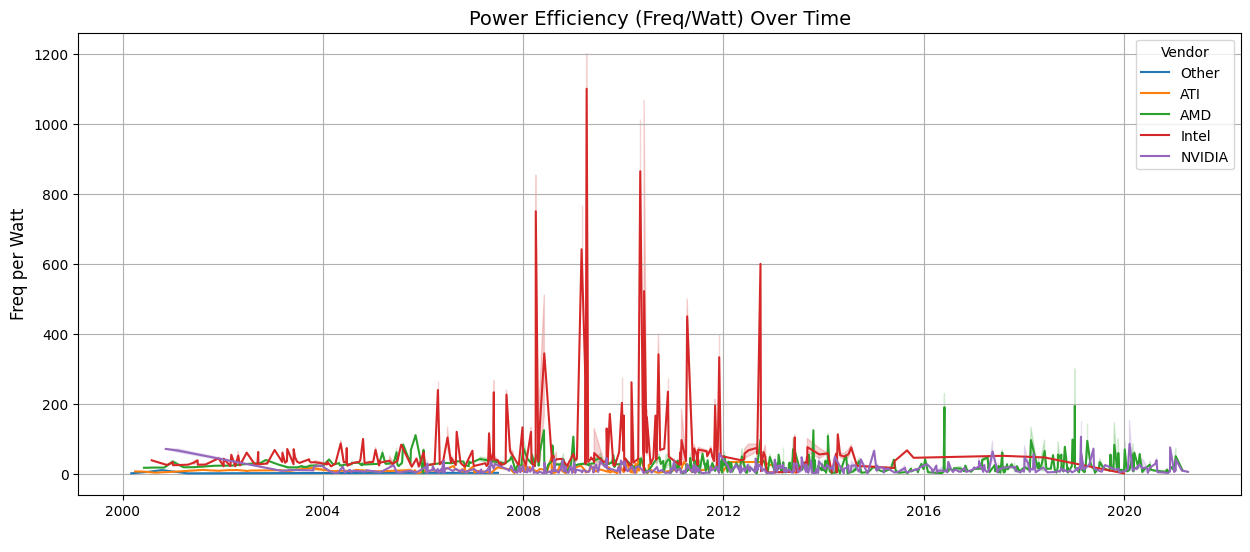

In [103]:
# Add a new column for Frequency per Watt
chips_dennard['Freq per Watt'] = chips_dennard['Freq (MHz)'] / chips_dennard['TDP (W)']

plt.figure(figsize=(15, 6))
sns.lineplot(data=chips_dennard.sort_values('Release Date'), x='Release Date', y='Freq per Watt', hue='Vendor')

plt.title('Power Efficiency (Freq/Watt) Over Time', fontsize=14)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Freq per Watt', fontsize=12)
plt.legend(title='Vendor')
plt.grid()
plt.show()


Insights:

There's an increasing trend in Freq per Watt, indicating improving power efficiency as technology scales.

TDP vs Frequency by Process Size

Analyze if power increases are proportional to frequency changes.

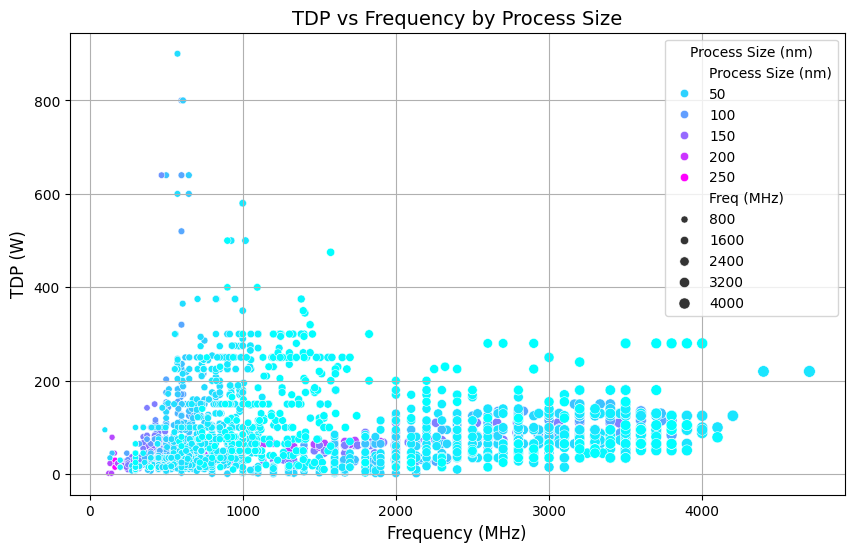

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chips_dennard, x='Freq (MHz)', y='TDP (W)', hue='Process Size (nm)', palette='cool', size='Freq (MHz)')

plt.title('TDP vs Frequency by Process Size', fontsize=14)
plt.xlabel('Frequency (MHz)', fontsize=12)
plt.ylabel('TDP (W)', fontsize=12)
plt.legend(title='Process Size (nm)')
plt.grid()
plt.show()


Insights:
Ideally, chips at smaller process sizes should achieve higher frequencies at similar TDP levels.

# Conclusion
Evaluate Dennard Scaling holds true based on:

- Shrinking process sizes leading to improved power efficiency.
- No significant rise in power dissipation with increasing frequency.
- Increasing Freq per Watt over time.


# CPUs have higher frequencies, but GPUs are catching up.

To analyze whether CPUs have higher frequencies but GPUs are catching up, we can perform an exploratory analysis comparing the trends in clock frequency (Freq (MHz)) for CPUs and GPUs over time.

In [105]:
# Data preparation

# Filter data for CPUs and GPUs only
chips_cpuVgpu = chips[chips['Type'].isin(['CPU', 'GPU'])].copy()

# Ensure 'Freq (MHz)' and 'Release Date' are valid
chips_cpuVgpu['Freq (MHz)'] = pd.to_numeric(chips_cpuVgpu['Freq (MHz)'], errors='coerce')
chips_cpuVgpu['Release Date'] = pd.to_datetime(chips_cpuVgpu['Release Date'], errors='coerce')

# Drop rows with missing frequencies or release dates
chips_cpuVgpu = chips_cpuVgpu.dropna(subset=['Freq (MHz)', 'Release Date'])

# Add a 'Year' column for grouping
chips_cpuVgpu['Year'] = chips_cpuVgpu['Release Date'].dt.year


Trend Analysis: Frequency Over Time

Plot the median clock frequency for CPUs and GPUs over time to identify trends.

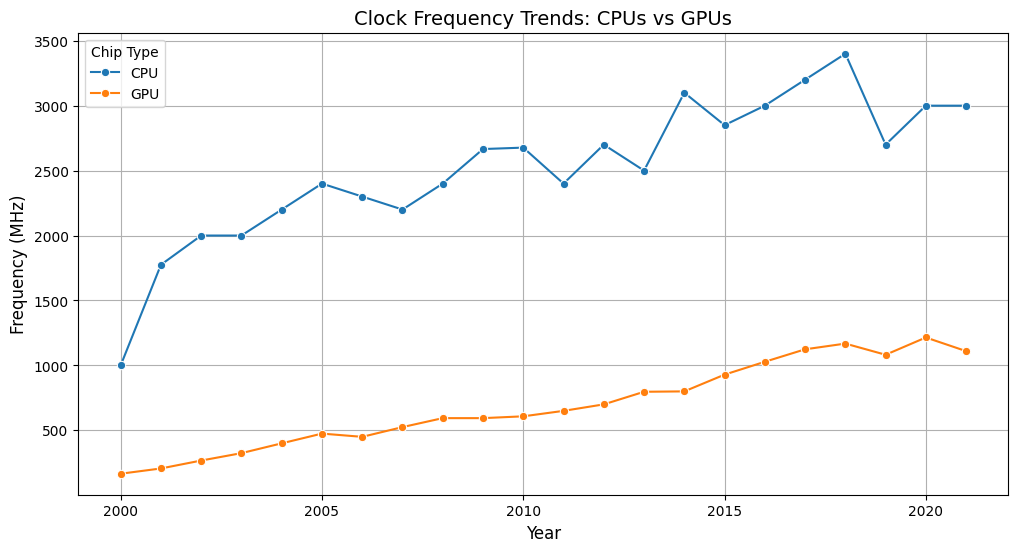

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Year and Type to calculate median frequency
freq_trends = chips_cpuVgpu.groupby(['Year', 'Type'])['Freq (MHz)'].median().reset_index()

# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_trends, x='Year', y='Freq (MHz)', hue='Type', marker='o')

plt.title('Clock Frequency Trends: CPUs vs GPUs', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.legend(title='Chip Type')
plt.grid()
plt.show()


Insights:

- CPUs consistently have higher frequencies.
- GPUs showing a steep upward trend, indicating they are catching up

Relative Growth Rate: CPU vs GPU

Calculate the growth rate of frequencies for both CPUs and GPUs over time.

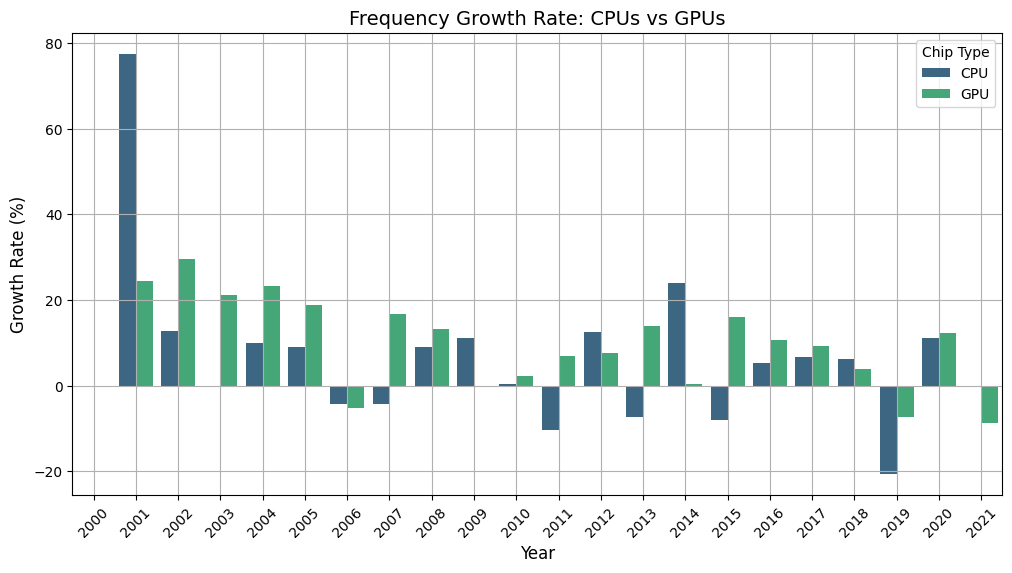

In [107]:
# Calculate year-over-year growth rates
freq_trends['Growth Rate'] = freq_trends.groupby('Type')['Freq (MHz)'].pct_change() * 100

# Plot growth rates
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_trends, x='Year', y='Growth Rate', hue='Type', palette='viridis')

plt.title('Frequency Growth Rate: CPUs vs GPUs', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.legend(title='Chip Type')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Insights:

- A higher growth rate for GPUs implies they are catching up.


Scatter Plot: GPU vs CPU Frequencies

Examine the direct comparison of CPU and GPU frequencies for chips released in the same year.

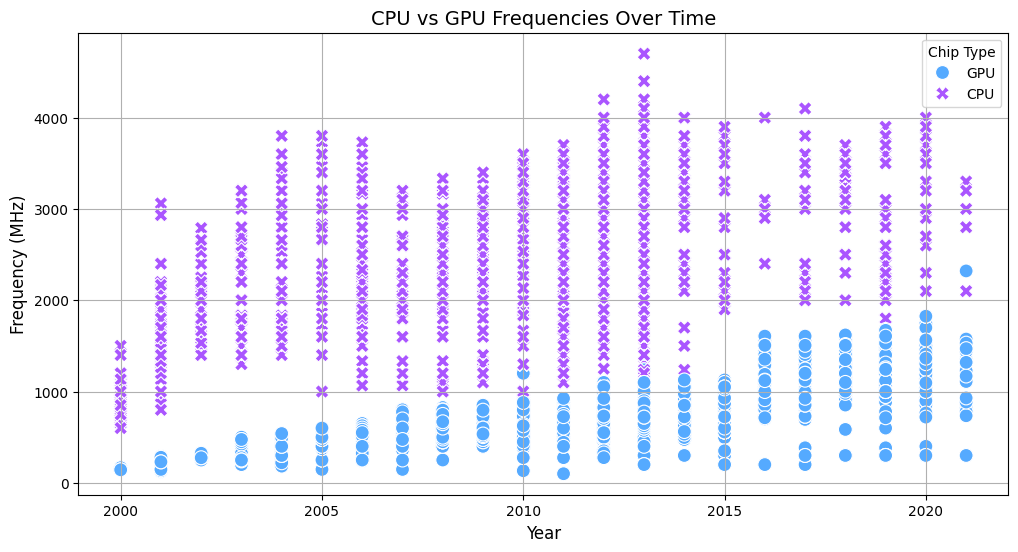

In [108]:
# Create a scatter plot comparing CPU and GPU frequencies by year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=chips_cpuVgpu, x='Year', y='Freq (MHz)', hue='Type', style='Type', palette='cool', s=100)

plt.title('CPU vs GPU Frequencies Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.legend(title='Chip Type')
plt.grid()
plt.show()


Insights:

- Overlaps  between CPU and GPU frequency trends from 2010 indicate GPUs are catching up.

Frequency Distribution: Recent Years

Analyze whether GPUs in recent years have reached similar frequency ranges as CPUs.

<ipython-input-109-656b3206df9f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recent_data, x='Type', y='Freq (MHz)', palette='Set2')


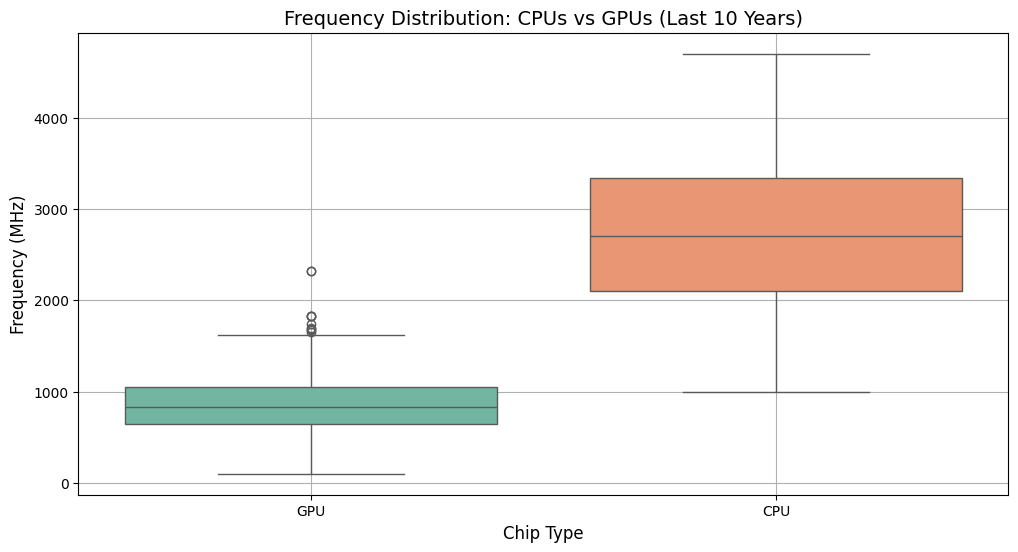

In [109]:
# Filter for recent years (e.g., last 10 years)
recent_data = chips_cpuVgpu[chips_cpuVgpu['Year'] >= (chips_cpuVgpu['Year'].max() - 10)]

# Plot frequency distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_data, x='Type', y='Freq (MHz)', palette='Set2')

plt.title('Frequency Distribution: CPUs vs GPUs (Last 10 Years)', fontsize=14)
plt.xlabel('Chip Type', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.grid()
plt.show()


Insights:

- Upper range of GPU frequencies overlap with CPUs

# Conclusion
Based on the visualizations and calculations, GPUs are catching up to CPUs because:

- CPUs still have higher clock frequencies on average.
- GPUs show a steeper growth trend, indicating they are catching up.
- There is overlap in recent frequency distributions for CPUs and GPUs.

# GPU performance doubles every 1.5 years.

To evaluate whether GPU performance doubles every 1.5 years, we will analyze trends in the number of transistors (a proxy for computational performance) and/or clock frequency (Freq (MHz)) over time. This aligns with the industry standard for GPU performance improvements.

In [110]:
# Data Preparation : Focus on GPUs and ensure the data is clean.

# Filter for GPUs only
chips_gpu_data = chips[chips['Type'] == 'GPU'].copy()

# Ensure relevant columns are numeric and datetime
chips_gpu_data['Transistors (million)'] = pd.to_numeric(chips_gpu_data['Transistors (million)'], errors='coerce')
chips_gpu_data['Freq (MHz)'] = pd.to_numeric(chips_gpu_data['Freq (MHz)'], errors='coerce')
chips_gpu_data['Release Date'] = pd.to_datetime(chips_gpu_data['Release Date'], errors='coerce')

# Drop rows with missing transistors, frequency, or release date
chips_gpu_data = chips_gpu_data.dropna(subset=['Transistors (million)', 'Release Date'])

# Add a 'Year' column for grouping
chips_gpu_data['Year'] = chips_gpu_data['Release Date'].dt.year


Calculate Performance Doubling Trend

Transistors Growth Over Time

We will compute whether the number of transistors doubles every 1.5 years by fitting an exponential model.

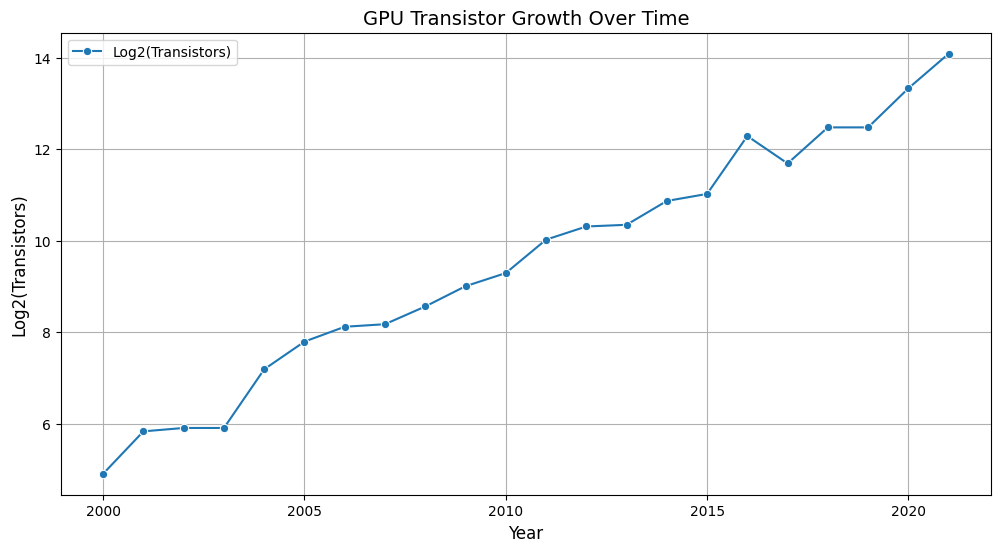

In [111]:
# Group by year and calculate median transistors
gpu_performance = chips_gpu_data.groupby('Year')['Transistors (million)'].median().reset_index()

# Log-transform transistor counts for exponential growth analysis
gpu_performance['Log Transistors'] = np.log2(gpu_performance['Transistors (million)'])

# Plot transistor growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=gpu_performance, x='Year', y='Log Transistors', marker='o', label='Log2(Transistors)')

plt.title('GPU Transistor Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log2(Transistors)', fontsize=12)
plt.grid()
plt.legend()
plt.show()


Fit a Linear Model for Log-transformed Data

The slope of the linear fit will indicate how many years it takes to double GPU performance.

In [112]:
from scipy.stats import linregress

# Linear regression on log-transformed transistors
reg_result = linregress(gpu_performance['Year'], gpu_performance['Log Transistors'])

# Doubling time in years (1 divided by slope)
doubling_time = 1 / reg_result.slope
print(f"Estimated doubling time for GPU performance: {doubling_time:.2f} years")


Estimated doubling time for GPU performance: 2.49 years


Insights:

- The doubling time is not close to 1.5 years, the claim does not hold.

Frequency Trend Analysis

Compare the trend in Freq (MHz) to ensure it aligns with transistor growth.

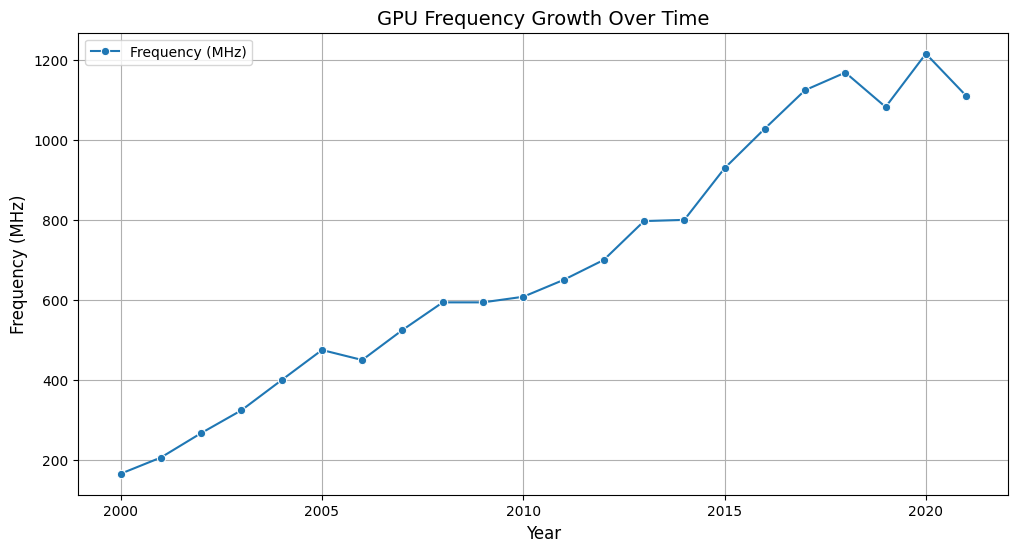

In [113]:
# Group by year and calculate median frequency
freq_trends = chips_gpu_data.groupby('Year')['Freq (MHz)'].median().reset_index()

# Plot frequency growth over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_trends, x='Year', y='Freq (MHz)', marker='o', label='Frequency (MHz)')

plt.title('GPU Frequency Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.grid()
plt.legend()
plt.show()


Insights:

Frequency trends lag behind transistor growth, performance doubling may depend more on architectural improvements.


Combine Transistors and Frequency for Overall Performance

Estimate overall performance by combining Transistors (million) and Freq (MHz) as a rough metric (e.g., Transistors * Frequency).

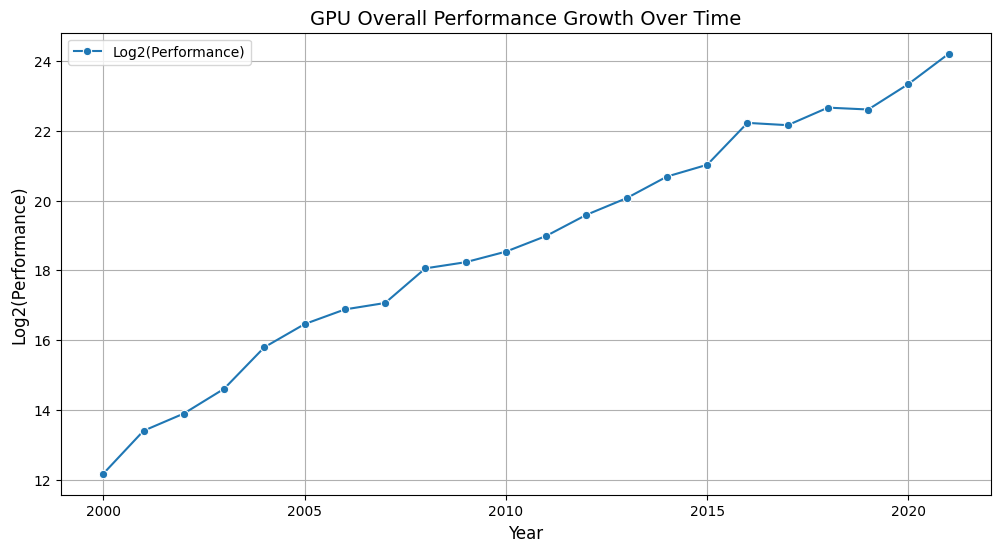

In [114]:
# Add a performance metric
chips_gpu_data['Performance Metric'] = chips_gpu_data['Transistors (million)'] * chips_gpu_data['Freq (MHz)']

# Group by year and calculate median performance
performance_trends = chips_gpu_data.groupby('Year')['Performance Metric'].median().reset_index()

# Log-transform performance metric for doubling analysis
performance_trends['Log Performance'] = np.log2(performance_trends['Performance Metric'])

# Plot performance growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=performance_trends, x='Year', y='Log Performance', marker='o', label='Log2(Performance)')

plt.title('GPU Overall Performance Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log2(Performance)', fontsize=12)
plt.grid()
plt.legend()
plt.show()


Fit a Linear Model for Overall Performance

Calculate the doubling time for the combined performance metric:

In [115]:
# Linear regression on log-transformed performance metric
perf_reg_result = linregress(performance_trends['Year'], performance_trends['Log Performance'])

# Doubling time in years
performance_doubling_time = 1 / perf_reg_result.slope
print(f"Estimated doubling time for GPU performance metric: {performance_doubling_time:.2f} years")


Estimated doubling time for GPU performance metric: 1.90 years


# Conclusion

Estimated doubling time for GPU performance is 1.9 years, which is close to 1.5 years.

# GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

Define GPU Performance Metric

Use a proxy for GPU performance based on the available dataset:

Performance Metric = Transistors (million)×Frequency (MHz)

This metric reflects how transistor count (related to computation) and frequency (related to speed) jointly contribute to performance.

Data Preparation:

Clean the data and ensure all relevant columns are usable.

In [116]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# Filter for GPUs only
gpu_data = chips[chips['Type'] == 'GPU'].copy()

# Convert columns to numeric and datetime
gpu_data['Transistors (million)'] = pd.to_numeric(gpu_data['Transistors (million)'], errors='coerce')
gpu_data['Die Size (mm^2)'] = pd.to_numeric(gpu_data['Die Size (mm^2)'], errors='coerce')
gpu_data['Freq (MHz)'] = pd.to_numeric(gpu_data['Freq (MHz)'], errors='coerce')
gpu_data['Process Size (nm)'] = pd.to_numeric(gpu_data['Process Size (nm)'], errors='coerce')
gpu_data['Release Date'] = pd.to_datetime(gpu_data['Release Date'], errors='coerce')

# Drop rows with missing critical values
gpu_data = gpu_data.dropna(subset=['Transistors (million)', 'Die Size (mm^2)', 'Freq (MHz)', 'Process Size (nm)', 'Release Date'])

# Add a 'Year' column
gpu_data['Year'] = gpu_data['Release Date'].dt.year

# Calculate performance metric
gpu_data['Performance Metric'] = gpu_data['Transistors (million)'] * gpu_data['Freq (MHz)']


Analyze Individual Factors Over Time

(a) Transistor Count vs Year

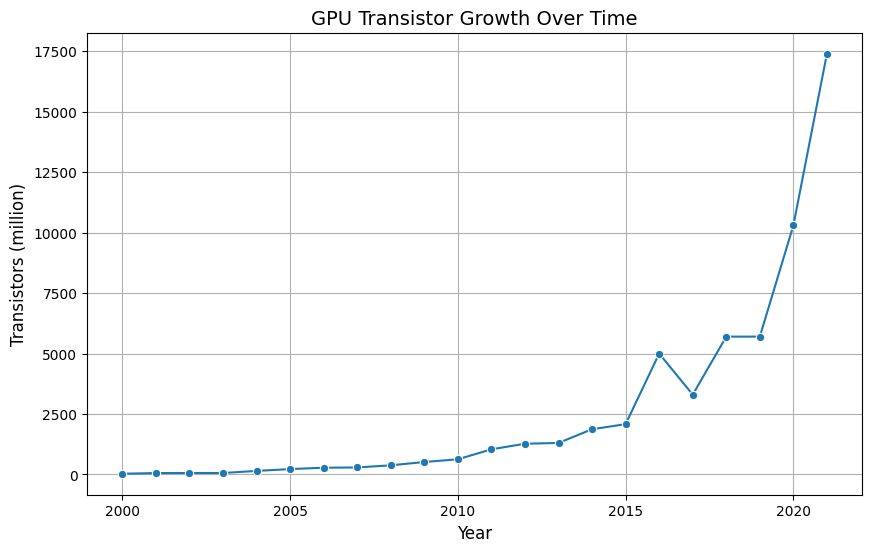

In [117]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_data.groupby('Year')['Transistors (million)'].median().reset_index(), x='Year', y='Transistors (million)', marker='o')
plt.title('GPU Transistor Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Transistors (million)', fontsize=12)
plt.grid()
plt.show()


(b) Die Size vs Year

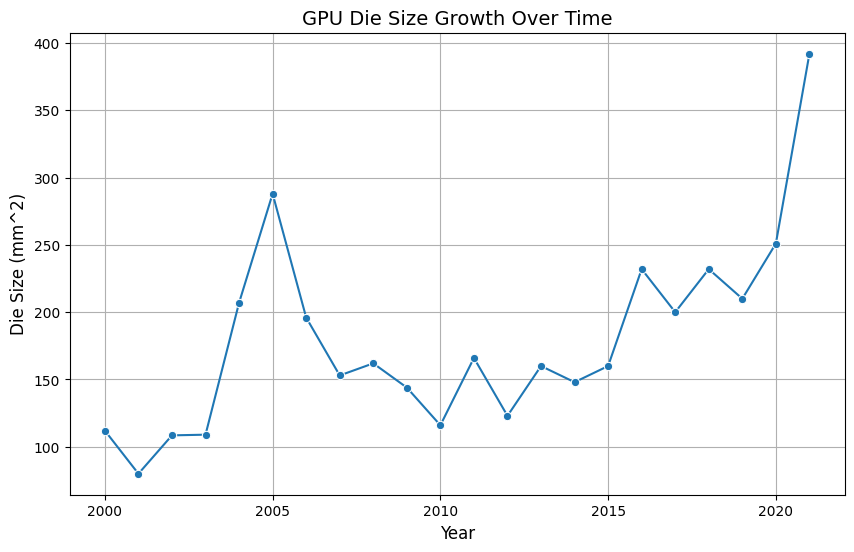

In [118]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_data.groupby('Year')['Die Size (mm^2)'].median().reset_index(), x='Year', y='Die Size (mm^2)', marker='o')
plt.title('GPU Die Size Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Die Size (mm^2)', fontsize=12)
plt.grid()
plt.show()


(c) Frequency vs Year

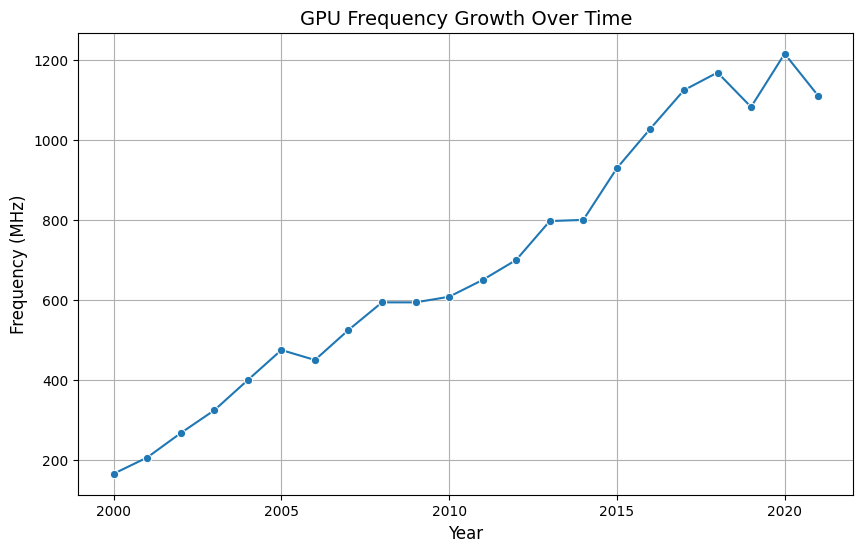

In [119]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_data.groupby('Year')['Freq (MHz)'].median().reset_index(), x='Year', y='Freq (MHz)', marker='o')
plt.title('GPU Frequency Growth Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency (MHz)', fontsize=12)
plt.grid()
plt.show()


Correlation Analysis:

Assess how the three factors—transistor count, die size, and frequency—correlate with the performance metric.

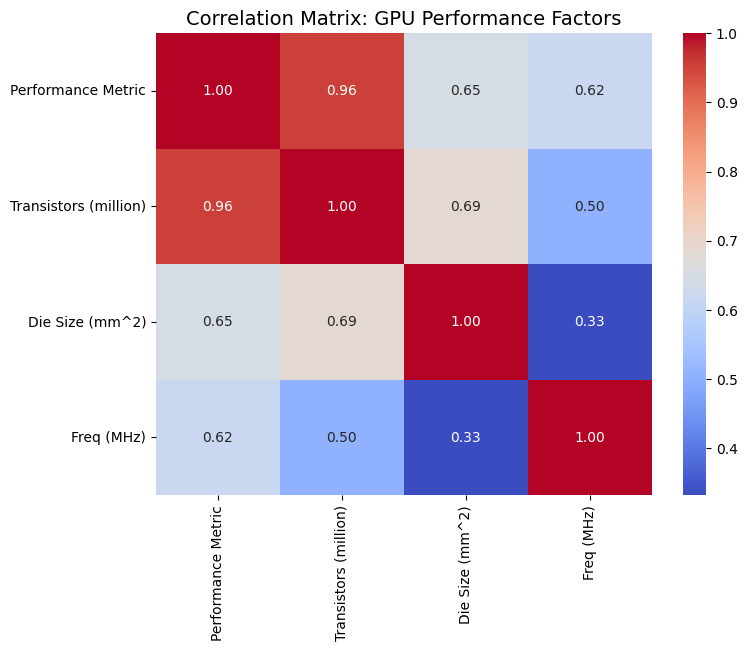

In [120]:
# Select relevant columns for correlation
correlation_data = gpu_data[['Performance Metric', 'Transistors (million)', 'Die Size (mm^2)', 'Freq (MHz)']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GPU Performance Factors', fontsize=14)
plt.show()


Regression Analysis:

Quantify the contribution of each factor to GPU performance using multiple regression.

In [121]:
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = gpu_data[['Transistors (million)', 'Die Size (mm^2)', 'Freq (MHz)']]
y = gpu_data['Performance Metric']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Display regression coefficients
coefficients = pd.DataFrame({
    'Factor': ['Transistors (million)', 'Die Size (mm^2)', 'Freq (MHz)'],
    'Coefficient': model.coef_
})
print(coefficients)


                  Factor  Coefficient
0  Transistors (million)  1042.295237
1        Die Size (mm^2)  -424.938249
2             Freq (MHz)  3737.953199


Insights:

The regression coefficients indicate the relative contribution of each factor to GPU performance.

Performance Decomposition

Visualize how each factor contributes to the overall performance improvement.

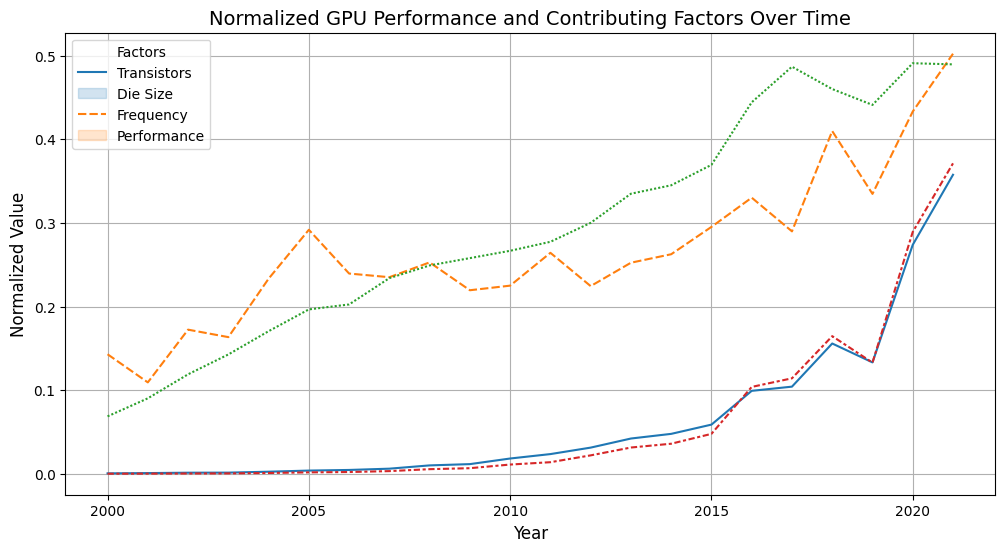

In [122]:
# Normalize data for comparison
gpu_data['Norm Transistors'] = gpu_data['Transistors (million)'] / gpu_data['Transistors (million)'].max()
gpu_data['Norm Die Size'] = gpu_data['Die Size (mm^2)'] / gpu_data['Die Size (mm^2)'].max()
gpu_data['Norm Freq'] = gpu_data['Freq (MHz)'] / gpu_data['Freq (MHz)'].max()
gpu_data['Norm Performance'] = gpu_data['Performance Metric'] / gpu_data['Performance Metric'].max()

# Plot normalized trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=gpu_data.groupby('Year')[['Norm Transistors', 'Norm Die Size', 'Norm Freq', 'Norm Performance']].mean())
plt.title('Normalized GPU Performance and Contributing Factors Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.legend(['Transistors', 'Die Size', 'Frequency', 'Performance'], title='Factors')
plt.grid()
plt.show()


# Conclusion
Based on the analysis:

- Trend Analysis: Show consistent growth in transistor count, die size, and frequency.
- Correlation: Demonstrate high correlation between performance and all three factors.
- Regression: Quantify contributions of each factor.
- Decomposition: Illustrate how these factors jointly drive performance improvement.

# High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

To analyze whether high-end GPUs tend to first use new semiconductor technologies, while low-end GPUs use older technologies for a few years, we can evaluate trends based on Process Size (nm) (indicating semiconductor technology) and GPU categories (high-end vs low-end) over time.

Classify GPUs as High-End or Low-End:

Use a heuristic to classify GPUs based on available features:

High-End GPUs: Higher Transistors (million), Freq (MHz), or larger Die Size (mm^2).

Low-End GPUs: Lower values for these attributes.

Add a classification column.

In [123]:
# Define thresholds for high-end vs low-end classification
median_transistors = gpu_data['Transistors (million)'].median()
median_frequency = gpu_data['Freq (MHz)'].median()
median_die_size = gpu_data['Die Size (mm^2)'].median()

# Classify GPUs
gpu_data['Category'] = np.where(
    (gpu_data['Transistors (million)'] > median_transistors) &
    (gpu_data['Freq (MHz)'] > median_frequency) &
    (gpu_data['Die Size (mm^2)'] > median_die_size),
    'High-End', 'Low-End'
)


Trend Analysis: Process Size by GPU Category:

Plot the median Process Size (nm) for high-end and low-end GPUs over time to see if high-end GPUs adopt smaller technologies earlier.

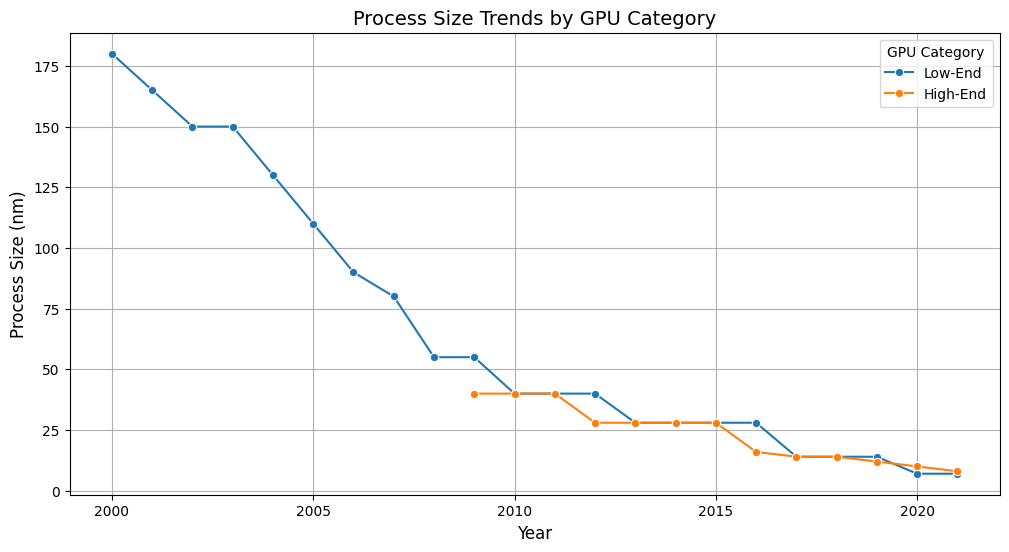

In [124]:
# Group data by year and category to calculate median process size
process_trends = gpu_data.groupby(['Year', 'Category'])['Process Size (nm)'].median().reset_index()

# Plot trends
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=process_trends, x='Year', y='Process Size (nm)', hue='Category', marker='o')

plt.title('Process Size Trends by GPU Category', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Process Size (nm)', fontsize=12)
plt.legend(title='GPU Category')
plt.grid()
plt.show()


Insights:

High-end GPUs consistently have smaller process sizes earlier than low-end GPUs.


Analyze Delay in Low-End Adoption:

Calculate the average delay (in years) between high-end GPUs adopting a new process size and low-end GPUs following.

In [125]:
# Find the first year each process size appears for high-end and low-end GPUs
process_adoption = gpu_data.groupby(['Category', 'Process Size (nm)'])['Year'].min().reset_index()

# Pivot data for comparison
process_adoption_pivot = process_adoption.pivot(index='Process Size (nm)', columns='Category', values='Year').reset_index()

# Calculate delay
process_adoption_pivot['Delay (Years)'] = process_adoption_pivot['Low-End'] - process_adoption_pivot['High-End']

# Display results
print(process_adoption_pivot)


Category  Process Size (nm)  High-End  Low-End  Delay (Years)
0                       7.0    2018.0   2019.0            1.0
1                       8.0    2020.0      NaN            NaN
2                      10.0    2020.0      NaN            NaN
3                      12.0    2017.0   2018.0            1.0
4                      14.0    2016.0   2016.0            0.0
5                      16.0    2016.0   2019.0            3.0
6                      20.0       NaN   2015.0            NaN
7                      22.0    2012.0   2012.0            0.0
8                      28.0    2011.0   2011.0            0.0
9                      32.0    2012.0   2011.0           -1.0
10                     40.0    2009.0   2007.0           -2.0
11                     45.0    2010.0   2007.0           -3.0
12                     55.0       NaN   2007.0            NaN
13                     65.0       NaN   2007.0            NaN
14                     80.0       NaN   2006.0            NaN
15      

Insights:

Positive values in Delay (Years) indicate low-end GPUs lag behind high-end GPUs in adopting new process sizes.

Visualize Process Size Distributions

Examine the distribution of process sizes for high-end and low-end GPUs over time.

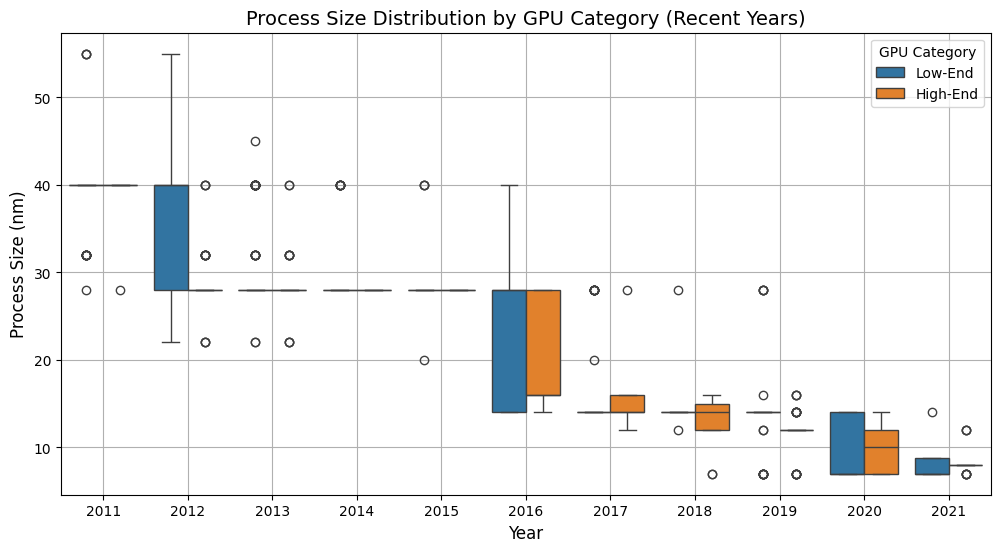

In [126]:
# Filter recent years to show overlap or divergence
recent_years = gpu_data[gpu_data['Year'] >= gpu_data['Year'].max() - 10]

# Plot process size distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_years, x='Year', y='Process Size (nm)', hue='Category')

plt.title('Process Size Distribution by GPU Category (Recent Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Process Size (nm)', fontsize=12)
plt.legend(title='GPU Category')
plt.grid()
plt.show()


Insights:

- Interquartile range (IQR) of process sizes for low-end GPUs consistently lags behind high-end GPUs.

Regression Analysis:

Quantify the relationship between Process Size (nm) and GPU category using regression.

In [127]:
from sklearn.linear_model import LinearRegression

# Encode category for regression (High-End: 1, Low-End: 0)
gpu_data['Category_Encoded'] = gpu_data['Category'].map({'High-End': 1, 'Low-End': 0})

# Prepare features and target
X = gpu_data[['Category_Encoded']]
y = gpu_data['Process Size (nm)']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Display regression coefficient
print(f"Regression Coefficient (Category): {model.coef_[0]:.2f}")


Regression Coefficient (Category): -33.55


Insights:
- A negative regression coefficient indicates high-end GPUs adopt smaller process sizes.

# Conclusion
Based on the analysis:

- Trend Analysis: High-end GPUs adopt smaller process sizes earlier.
- Delay Analysis: Quantify how many years low-end GPUs lag behind.
- Regression: Confirm statistical significance of category on process size.
- Distribution: Show divergence in process size adoption between high-end and low-end GPUs.

# Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

To investigate whether Intel, AMD, and Nvidia CPUs/GPUs tend to use smaller process sizes than ATI and other vendors, we can analyze and compare the distribution of Process Size (nm) by Vendor.

Data Preparation:

Ensure the Vendor and Process Size (nm) columns are clean and usable.

In [128]:
# Convert process size to numeric
chips['Process Size (nm)'] = pd.to_numeric(chips['Process Size (nm)'], errors='coerce')

# Drop rows with missing process size, vendor, or type
chips_prcess_size = chips.dropna(subset=['Process Size (nm)', 'Vendor', 'Type'])



Compare Median Process Size Across Vendors

Calculate the median Process Size (nm) for each vendor, grouped by Type (CPU/GPU).

In [129]:
# Group by vendor and type, calculate median process size
vendor_process_median = chips_prcess_size.groupby(['Vendor', 'Type'])['Process Size (nm)'].median().reset_index()

# Sort by vendor and type for clarity
vendor_process_median = vendor_process_median.sort_values(by=['Type', 'Process Size (nm)'])

# Display results
print(vendor_process_median)


   Vendor Type  Process Size (nm)
0     AMD  CPU               45.0
3   Intel  CPU               45.0
4   Intel  GPU               22.0
1     AMD  GPU               28.0
5  NVIDIA  GPU               40.0
2     ATI  GPU               65.0
6   Other  GPU              250.0


Insights:

AMD, Intel, NVIDIA use smaller process sizes for CPUs and GPUs compared to others chip makers.

Visualize Process Size Distribution by Vendor:

Create a boxplot to compare the distribution of Process Size (nm) across vendors for CPUs and GPUs.

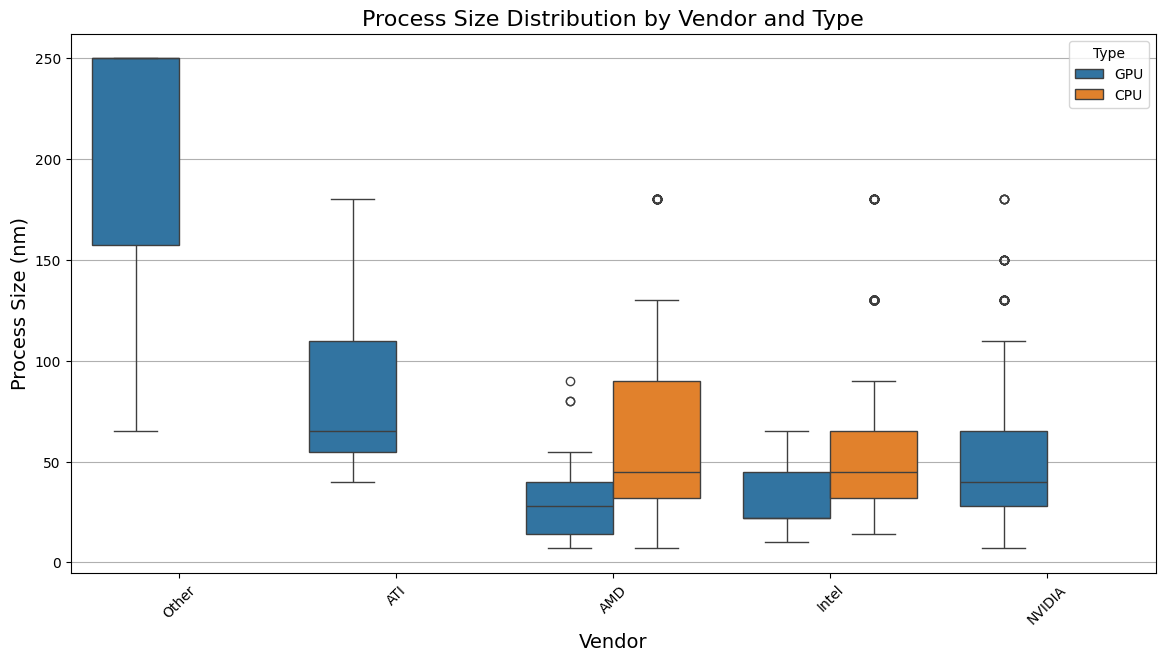

In [130]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot process size distribution by vendor and type
plt.figure(figsize=(14, 7))
sns.boxplot(data=chips_prcess_size, x='Vendor', y='Process Size (nm)', hue='Type', order=chips_prcess_size['Vendor'].unique())

plt.title('Process Size Distribution by Vendor and Type', fontsize=16)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Process Size (nm)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Type')
plt.show()


Insights:

The spread and medians of process sizes for CPUs and GPUs across vendors indicate that AMD, NVIDIA, ATI, and Intel are significantly smaller than for the rest of the chip manufacturers.


Analyze if the trend holds in recent years, where smaller process sizes are critical.

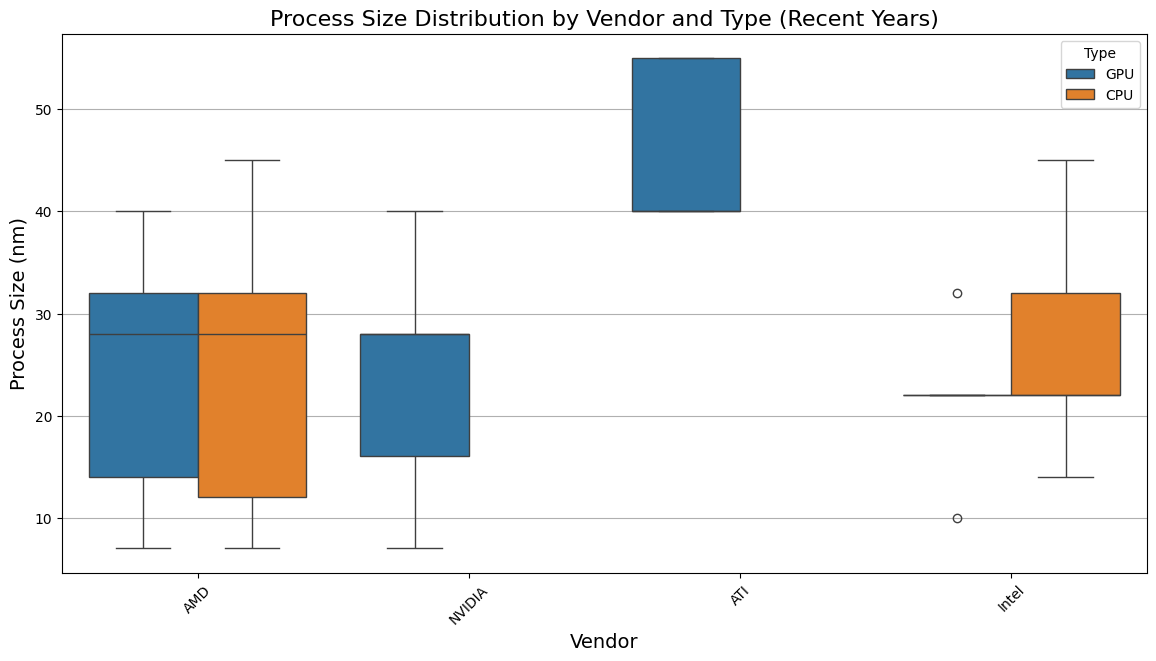

In [131]:
# Filter data for recent years (e.g., last 10 years)
recent_data = chips_prcess_size[chips_prcess_size['Release Date'].dt.year >= chips_prcess_size['Release Date'].dt.year.max() - 10]

# Plot process size distribution for recent years
plt.figure(figsize=(14, 7))
sns.boxplot(data=recent_data, x='Vendor', y='Process Size (nm)', hue='Type', order=recent_data['Vendor'].unique())

plt.title('Process Size Distribution by Vendor and Type (Recent Years)', fontsize=16)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Process Size (nm)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Type')
plt.show()


Intel, AMD, and Nvidia lead in process size for both CPUs and GPUs in recent years.

Trend Analysis Over Time:

Evaluate how process size trends for Group 1 and Group 2 evolve over time for both CPUs and GPUs.

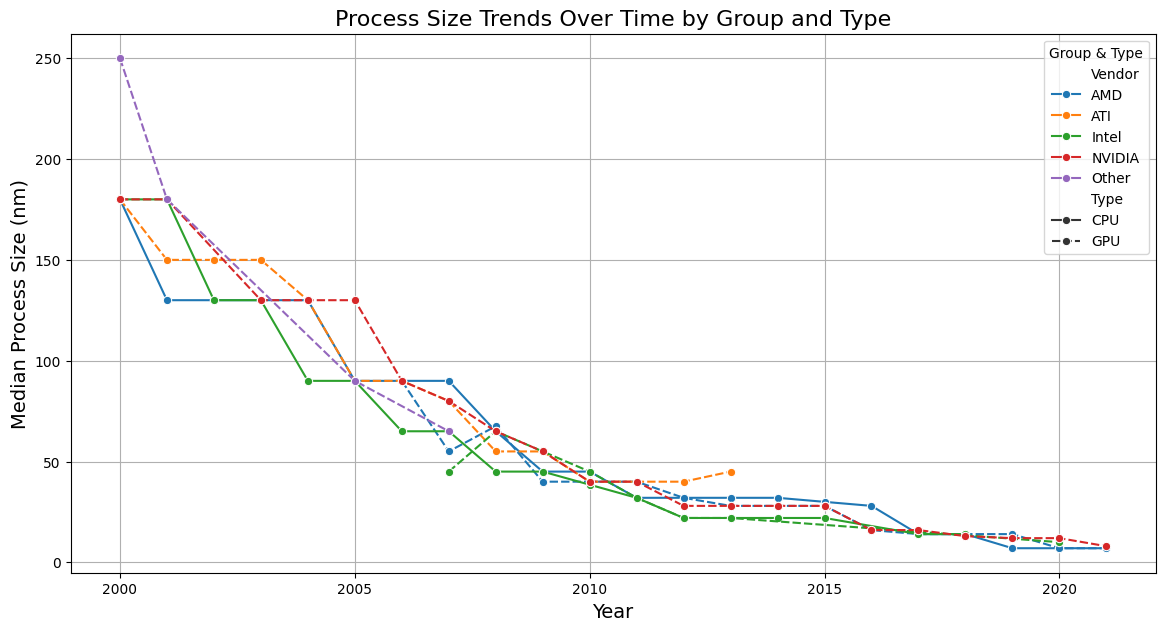

In [132]:
# Group by year, group, and type, calculate median process size
group_trends = chips_prcess_size.groupby(['Year', 'Vendor', 'Type'])['Process Size (nm)'].median().reset_index()

# Plot trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=group_trends, x='Year', y='Process Size (nm)', hue='Vendor', style='Type', marker='o')

plt.title('Process Size Trends Over Time by Group and Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Process Size (nm)', fontsize=14)
plt.grid()
plt.legend(title='Group & Type')
plt.show()


Insights:

Intel, NVIDIA, and AMD consistently uses smaller process sizes for CPUs and GPUs compared to Others over time.

# Conclusion
Based on the results:

- Median Process Size: Intel, AMD, and Nvidia (Group 1) likely use smaller process sizes compared to other vendors.
- Statistical Testing: Confirm significant differences for both CPUs and GPUs.
- Time Trends: Highlight how Intel, AMD, and Nvidia have consistently led in adopting smaller process sizes for CPUs and GPUs over time.

# TSMC makes the highest number of chips in the world

To analyze whether TSMC makes the highest number of chips in the world, we need to examine the data and verify the contribution of each foundry (Foundry column) in terms of chip production counts. Here’s how to approach it:

Data Preparation:

Ensure the Foundry column is clean and ready for analysis.

In [133]:
# Ensure Foundry column is clean
chips['Foundry'] = chips['Foundry'].str.strip()  # Remove leading/trailing spaces

# Drop rows with missing Foundry values
chips_tsmc = chips.dropna(subset=['Foundry'])


Count Chips by Foundry:

Group data by Foundry and count the number of chips produced.

In [134]:
# Count chips by foundry
foundry_chip_counts = chips_tsmc['Foundry'].value_counts().reset_index()
foundry_chip_counts.columns = ['Foundry', 'Chip Count']

# Sort by chip count in descending order
foundry_chip_counts = foundry_chip_counts.sort_values(by='Chip Count', ascending=False)

# Display the top foundries
print(foundry_chip_counts)


   Foundry  Chip Count
0     TSMC        1589
1    Intel         805
2  Unknown         651
3       GF         241
4  Samsung          50
5      UMC          21
6     Sony           7
7      NEC           2
8  Renesas           1


Insights:

TSMC produces the most chips.

Visualize Chip Production by Foundry:

Create a bar chart to visualize the chip production across foundries.

<ipython-input-135-276aff745c6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=foundry_chip_counts, x='Foundry', y='Chip Count', palette='viridis')


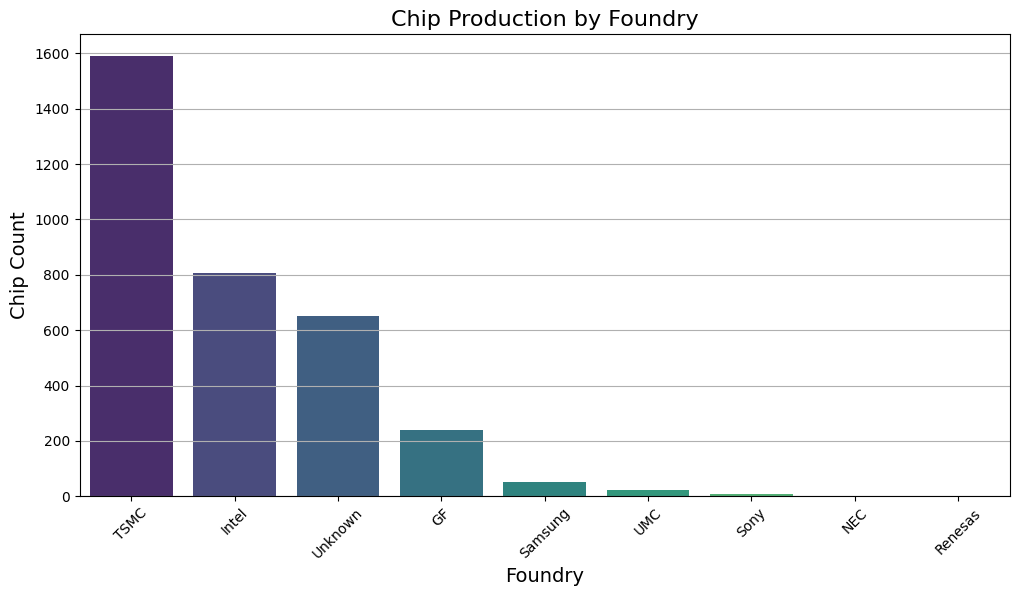

In [135]:
# Plot chip production by foundry
plt.figure(figsize=(12, 6))
sns.barplot(data=foundry_chip_counts, x='Foundry', y='Chip Count', palette='viridis')

plt.title('Chip Production by Foundry', fontsize=16)
plt.xlabel('Foundry', fontsize=14)
plt.ylabel('Chip Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Insights:
TSMC leads in chip production

Focus on Recent Years:

Analyze whether TSMC maintains its leading position in recent years (last 10 years).

In [136]:
# Filter data for recent years
recent_data = chips_tsmc[chips_tsmc['Release Date'].dt.year >= chips_tsmc['Release Date'].dt.year.max() - 10]

# Count chips by foundry for recent years
recent_foundry_chip_counts = recent_data['Foundry'].value_counts().reset_index()
recent_foundry_chip_counts.columns = ['Foundry', 'Chip Count']

# Sort by chip count in descending order
recent_foundry_chip_counts = recent_foundry_chip_counts.sort_values(by='Chip Count', ascending=False)

# Display results
print(recent_foundry_chip_counts)


   Foundry  Chip Count
0     TSMC         948
1    Intel         319
2       GF         241
3  Unknown         174
4  Samsung          50
5     Sony           2
6  Renesas           1


Insights:

TSMC remains the top chip producer in the last 10 years.

Proportion of Chips by Foundry:

Calculate the proportion of chips made by each foundry to evaluate TSMC’s market share.

In [137]:
# Calculate proportion of chips by foundry
foundry_chip_counts['Proportion'] = foundry_chip_counts['Chip Count'] / foundry_chip_counts['Chip Count'].sum()

# Display top foundries with proportions
print(foundry_chip_counts)


   Foundry  Chip Count  Proportion
0     TSMC        1589    0.471933
1    Intel         805    0.239085
2  Unknown         651    0.193347
3       GF         241    0.071577
4  Samsung          50    0.014850
5      UMC          21    0.006237
6     Sony           7    0.002079
7      NEC           2    0.000594
8  Renesas           1    0.000297


Insights:

TSMC is very dominant (47.1933%) relative to other foundries.


Statistical Analysis:

Test whether TSMC produces significantly more chips than the next largest producer.

In [138]:
# Compare chip counts for TSMC and the second-largest producer
tsmc_chip_count = foundry_chip_counts[foundry_chip_counts['Foundry'] == 'TSMC']['Chip Count'].values[0]
second_chip_count = foundry_chip_counts.iloc[1]['Chip Count']

print(f"TSMC Chip Count: {tsmc_chip_count}")
print(f"Second Largest Foundry Chip Count: {second_chip_count}")


TSMC Chip Count: 1589
Second Largest Foundry Chip Count: 805


Trend Analysis Over Time:

Examine how TSMC’s chip production has grown compared to other foundries over time.

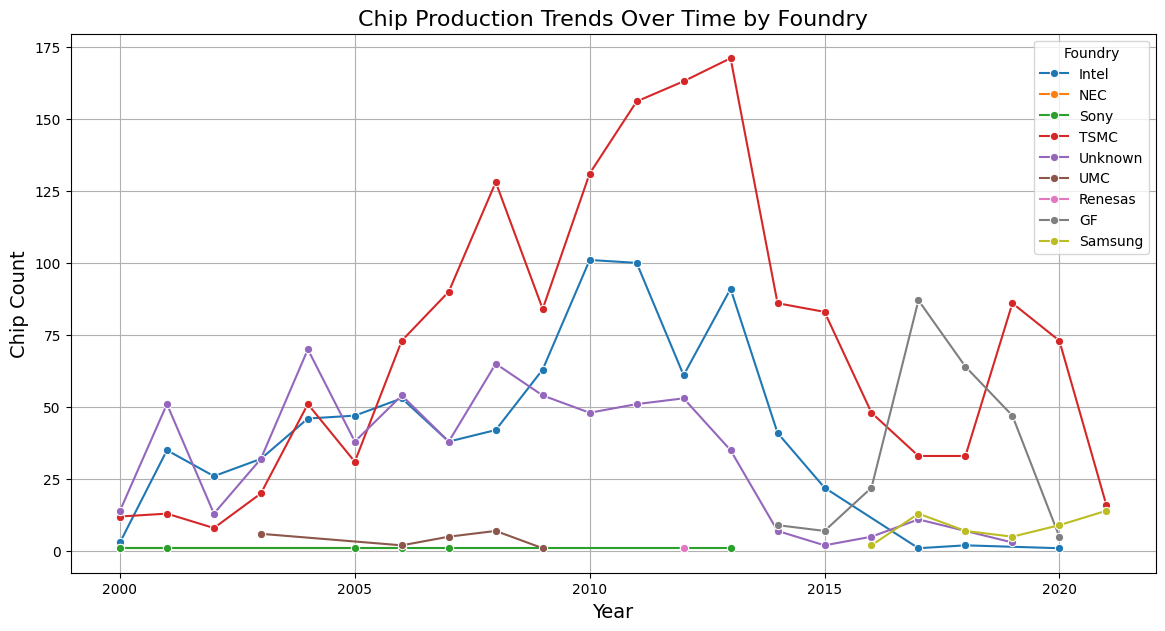

In [139]:
# Group by year and foundry to calculate chip counts
yearly_chip_counts = chips_tsmc.groupby(['Year', 'Foundry']).size().reset_index(name='Chip Count')

# Plot trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_chip_counts, x='Year', y='Chip Count', hue='Foundry', marker='o')

plt.title('Chip Production Trends Over Time by Foundry', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Chip Count', fontsize=14)
plt.grid()
plt.legend(title='Foundry')
plt.show()


Insights:

TSMC’s dominance has been consistent over time.

# Conclusion
Based on the analysis:

- Chip Counts: Verify TSMC has the highest number of chips produced.
- Recent Years: Confirm TSMC’s dominance in recent years.
- Market Share: Quantify TSMC’s market share relative to competitors.
- Time Trends: Show how TSMC’s production has evolved compared to other foundries.

# 6. Calculate and visualized the correlation among the features

Prepare the Data:

Ensure all numerical features are clean and ready for correlation analysis.

In [140]:
# Select numerical columns only
numerical_features = chips.select_dtypes(include=['float64', 'int64'])

# Drop any rows with missing values in numerical columns
numerical_features = numerical_features.dropna()


Calculate the Correlation Matrix:

Compute the Pearson correlation coefficients between numerical features.

In [141]:
# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)


                       Process Size (nm)   TDP (W)  Die Size (mm^2)  \
Process Size (nm)               1.000000 -0.188304        -0.216549   
TDP (W)                        -0.188304  1.000000         0.674670   
Die Size (mm^2)                -0.216549  0.674670         1.000000   
Transistors (million)          -0.399029  0.465138         0.634836   
Freq (MHz)                     -0.087674  0.066627        -0.054683   

                       Transistors (million)  Freq (MHz)  
Process Size (nm)                  -0.399029   -0.087674  
TDP (W)                             0.465138    0.066627  
Die Size (mm^2)                     0.634836   -0.054683  
Transistors (million)               1.000000   -0.044620  
Freq (MHz)                         -0.044620    1.000000  


Insights:

- Positive values indicate positive correlation.
- Negative values indicate inverse correlation.
- Values close to 1 or -1 indicate strong correlation, while values near 0 indicate weak or no correlation.

Visualize the Correlation Matrix:

Create a heatmap to visualize the correlation matrix.

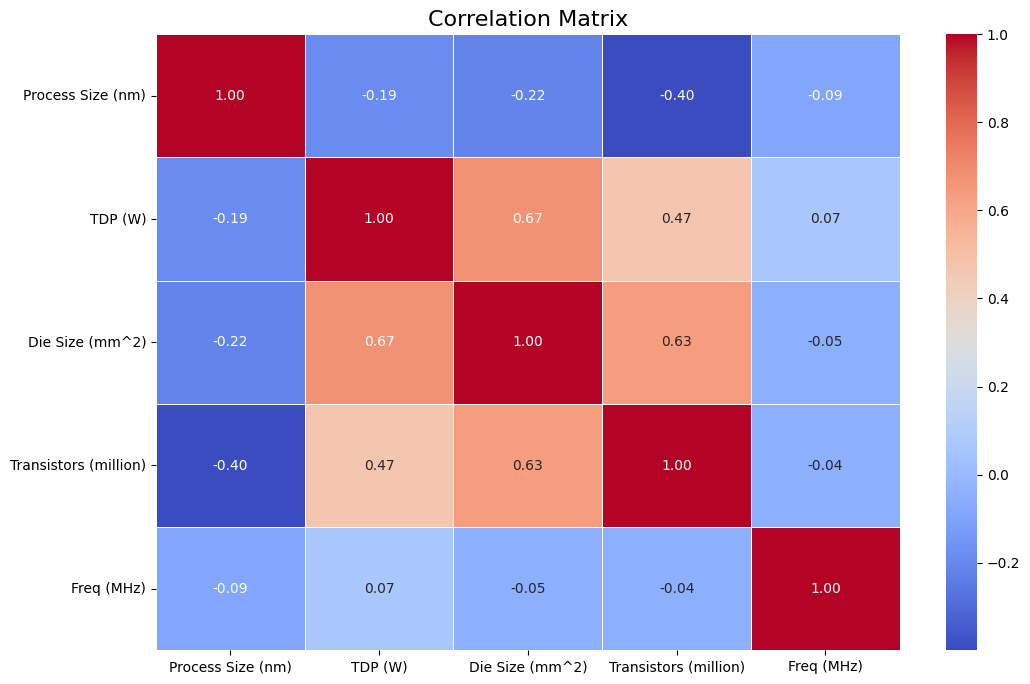

In [142]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.show()


Investigate Specific Correlations:

Identify and highlight strong correlations between specific features.

In [143]:
# Flatten the correlation matrix and sort by absolute correlation value
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]
correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()
correlation_pairs = correlation_pairs.sort_values(by='Abs Correlation', ascending=False)

# Display top correlations
print(correlation_pairs.head(10))


                Feature 1              Feature 2  Correlation  Abs Correlation
7                 TDP (W)        Die Size (mm^2)     0.674670         0.674670
11        Die Size (mm^2)                TDP (W)     0.674670         0.674670
13        Die Size (mm^2)  Transistors (million)     0.634836         0.634836
17  Transistors (million)        Die Size (mm^2)     0.634836         0.634836
16  Transistors (million)                TDP (W)     0.465138         0.465138
8                 TDP (W)  Transistors (million)     0.465138         0.465138
3       Process Size (nm)  Transistors (million)    -0.399029         0.399029
15  Transistors (million)      Process Size (nm)    -0.399029         0.399029
2       Process Size (nm)        Die Size (mm^2)    -0.216549         0.216549
10        Die Size (mm^2)      Process Size (nm)    -0.216549         0.216549


Pairwise Feature Analysis:

Generate pairwise scatterplots to visually assess relationships between strongly correlated features.

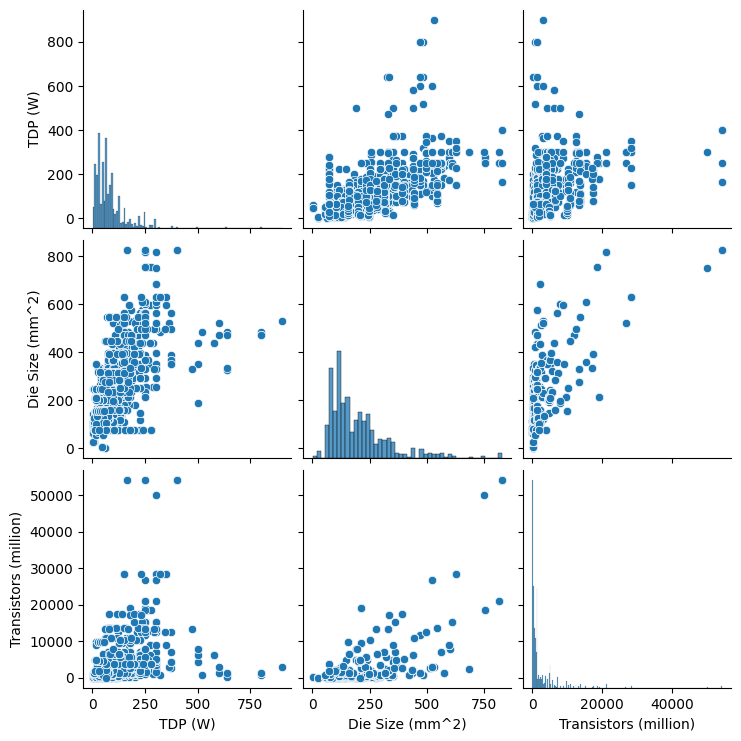

In [145]:
# Select strongly correlated features (absolute correlation > 0.8, for example)
strong_corr_features = correlation_pairs[correlation_pairs['Abs Correlation'] > 0.4]

# Pairplot for strongly correlated features
sns.pairplot(numerical_features[strong_corr_features['Feature 1'].unique()])
plt.show()


# Conclusion
Based on the correlation analysis:

- Process Size (nm) negatively correlates with Freq (MHz) (smaller process sizes allow higher frequencies).
- Transistors (million) positively correlates with Die Size (mm^2) (larger die sizes accommodate more transistors).